Naive Bayes

1) Prepare a classification model using Naive Bayes for salary data .
Data Description:
age -- age of a person
workclass	-- A work class is a grouping of work
education	-- Education of an individuals
maritalstatus -- Marital status of an individulas
occupation	 -- occupation of an individuals
relationship --
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week
native -- Native of an individual
Salary -- salary of an individual


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from collections import Counter
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train=pd.read_csv("/content/SalaryData_Train.csv")
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
test=pd.read_csv("/content/SalaryData_Test.csv")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
rawdata=train.append(test)
rawdata.reset_index(inplace=True)
rawdata

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
#data exporation a binary classification f task of our data to predict
#is yes or no binomial distribution

In [ ]:
print(rawdata.shape)

(45221, 15)


In [ ]:
rawdata.describe()

,index,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,12565.448575,38.548086,10.118463,1101.454700,88.548617,40.938038
std,8337.871072,13.217981,2.552909,7506.511295,404.838249,12.007640
min,0.000000,17.000000,1.000000,0.000000,0.000000,1.000000
25%,5652.000000,28.000000,9.000000,0.000000,0.000000,40.000000
50%,11305.000000,37.000000,10.000000,0.000000,0.000000,40.000000
75%,18855.000000,47.000000,13.000000,0.000000,0.000000,45.000000
max,30160.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          45221 non-null  int64 
 1   age            45221 non-null  int64 
 2   workclass      45221 non-null  object
 3   education      45221 non-null  object
 4   educationno    45221 non-null  int64 
 5   maritalstatus  45221 non-null  object
 6   occupation     45221 non-null  object
 7   relationship   45221 non-null  object
 8   race           45221 non-null  object
 9   sex            45221 non-null  object
 10  capitalgain    45221 non-null  int64 
 11  capitalloss    45221 non-null  int64 
 12  hoursperweek   45221 non-null  int64 
 13  native         45221 non-null  object
 14  Salary         45221 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [ ]:
rawdata.isnull().sum()

index            0
age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
#duplicated value
rawdata[rawdata.duplicated()]

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [ ]:
rawdata[rawdata.duplicated()].shape

(0, 15)

In [ ]:
#type of variable
numerical_features=[feature for feature in rawdata.columns if rawdata[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))
# Visualize the numerical variables
rawdata[numerical_features].head()


Number of numerical variables: 6


,index,age,educationno,capitalgain,capitalloss,hoursperweek
0,0,39,13,2174,0,40
1,1,50,13,0,0,13
2,2,38,9,0,0,40
3,3,53,7,0,0,40
4,4,28,13,0,0,40


In [ ]:
discrete_feature=[feature for feature in numerical_features if len(rawdata[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))


Discrete Variables Count: 1


In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))


Continuous Feature Count 5


In [ ]:
categorical = [var for var in rawdata.columns if rawdata[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)


There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [ ]:
for var in categorical:

    print(rawdata[var].value_counts())


 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales           

In [ ]:
for var in categorical:

    print(rawdata[var].value_counts()/np.float(len(rawdata)))

 Private             0.736516
 Self-emp-not-inc    0.083943
 Local-gov           0.068552
 State-gov           0.043033
 Self-emp-inc        0.036399
 Federal-gov         0.031092
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326906
 Some-college    0.218881
 Bachelors       0.167400
 Masters         0.055594
 Assoc-voc       0.043321
 11th            0.035802
 Assoc-acdm      0.033325
 10th            0.027045
 7th-8th         0.018200
 Prof-school     0.017359
 9th             0.014949
 12th            0.012760
 Doctorate       0.012030
 5th-6th         0.009929
 1st-4th         0.004909
 Preschool       0.001592
Name: education, dtype: float64
 Married-civ-spouse       0.465602
 Never-married            0.322793
 Divorced                 0.139249
 Separated                0.031202
 Widowed                  0.028239
 Married-spouse-absent    0.012207
 Married-AF-spouse        0.000708
Name: maritalstatus, dtype: float64
 Craft-repair         0.13312

In [ ]:
for var in categorical:

    print(var, ' contains ', len(rawdata[var].unique()), ' labels')


workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [ ]:
rawdata.corr()

,index,age,educationno,capitalgain,capitalloss,hoursperweek
index,1.000000,-0.003723,0.000634,-0.001517,-0.002175,-0.002257
age,-0.003723,1.000000,0.037623,0.079682,0.059426,0.101992
educationno,0.000634,0.037623,1.000000,0.126907,0.081741,0.146206
capitalgain,-0.001517,0.079682,0.126907,1.000000,-0.032095,0.083880
capitalloss,-0.002175,0.059426,0.081741,-0.032095,1.000000,0.054220
hoursperweek,-0.002257,0.101992,0.146206,0.083880,0.054220,1.000000


[]

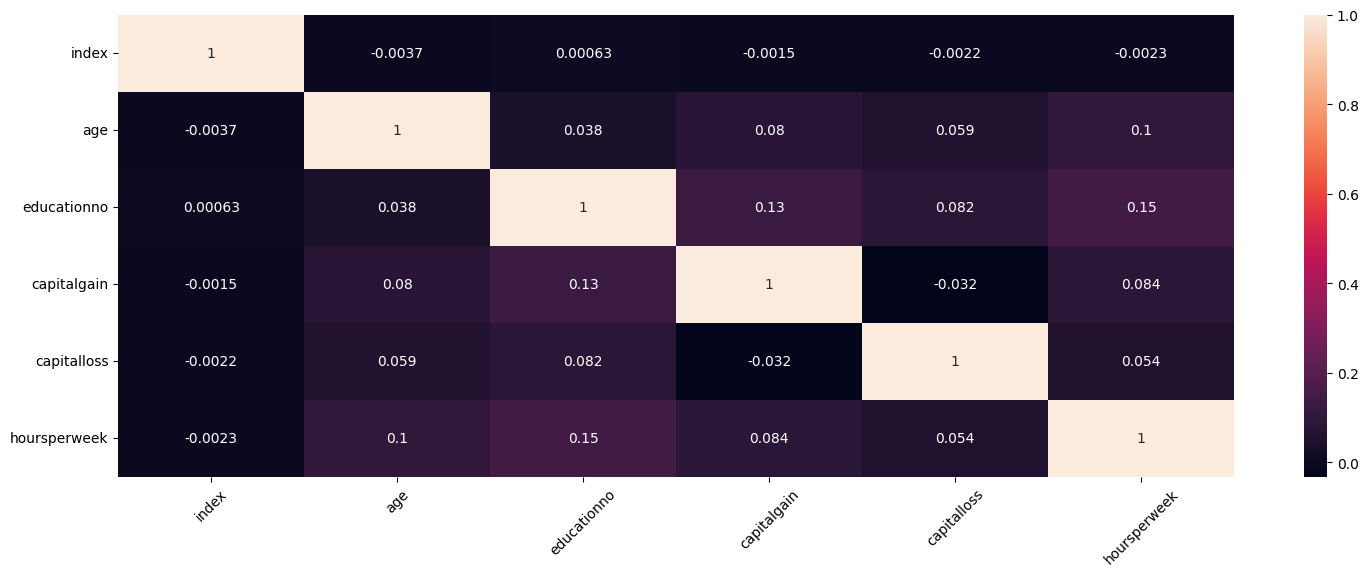

In [ ]:
#performing EDA on data
fig=plt.figure(figsize=(18,6))
sns.heatmap(rawdata.corr(),annot=True);
plt.xticks(rotation=45)
plt.plot()

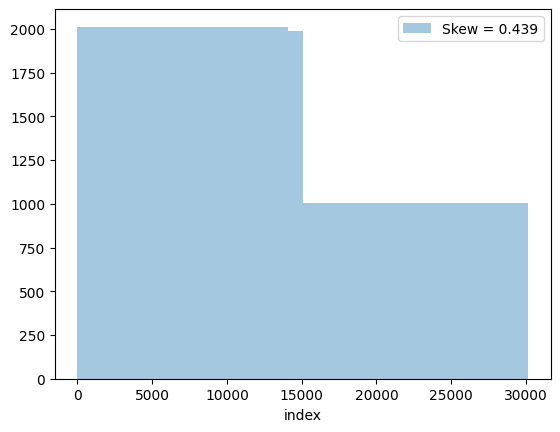

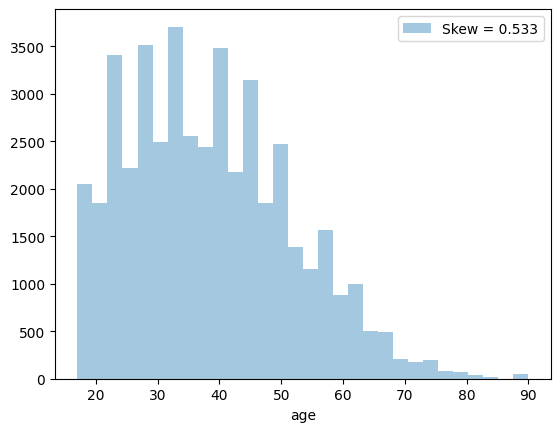

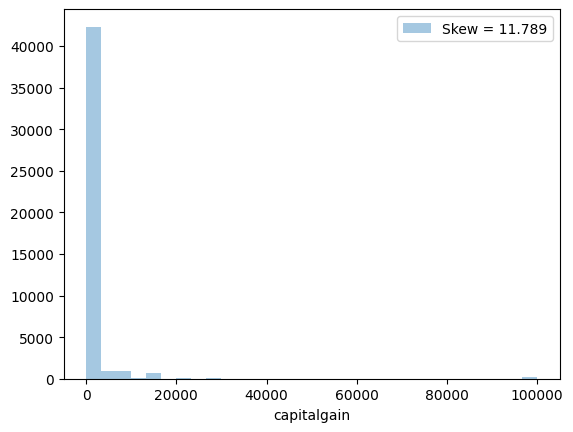

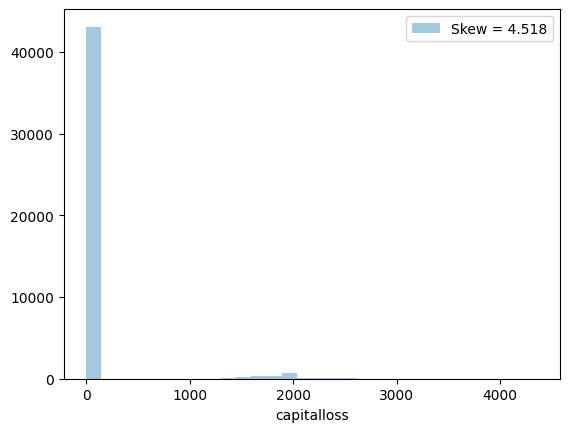

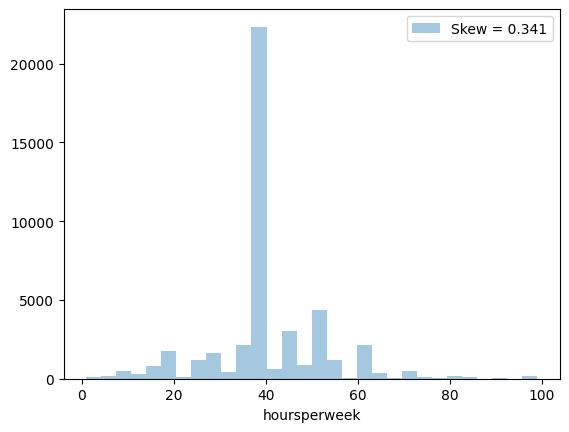

In [ ]:
for feat in continuous_feature:
  skew=rawdata[feat].skew()
  sns.distplot(rawdata[feat],kde=False,label='Skew = %.3f' %(skew), bins=30)
  plt.legend(loc='best')
  plt.show()


In [ ]:
#detecting outlier in data set
def outlier(df):
  outlier_indices=[]
  for col in df.columns.tolist():
    q1=np.percentile(df[col],25)
    q3=np.percentile(df[col],75)
    IQR=q3-q1
    outlier_step=1.5*IQR
    outlier_list_col = df[(df[col] < q1 - outlier_step )| (df[col] > q3 + outlier_step )].index
    outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier(rawdata[continuous_feature]))))


The dataset contains 0 observations with more than 2 outliers


In [ ]:
continuous_feature


['index', 'age', 'capitalgain', 'capitalloss', 'hoursperweek']

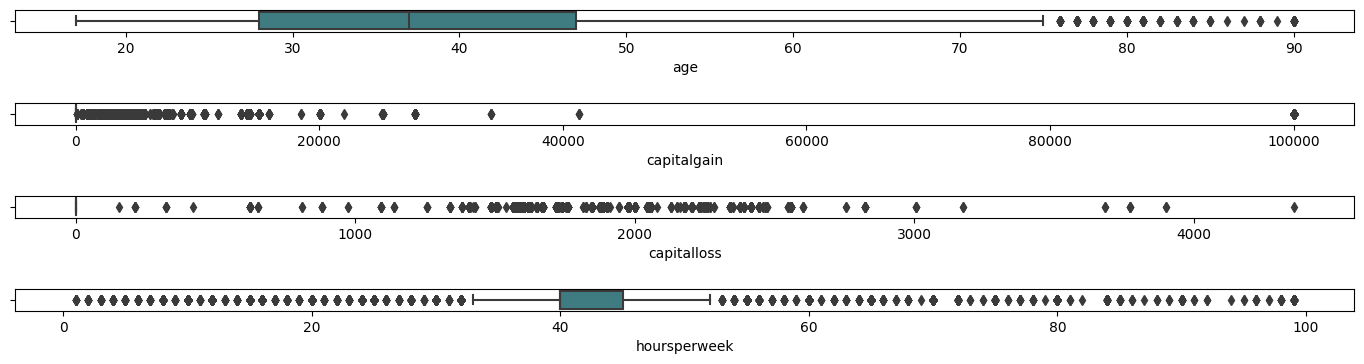

In [ ]:
#outlier detections
ot=rawdata.copy()
fig, axes=plt.subplots(4,1,figsize=(14,4),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)


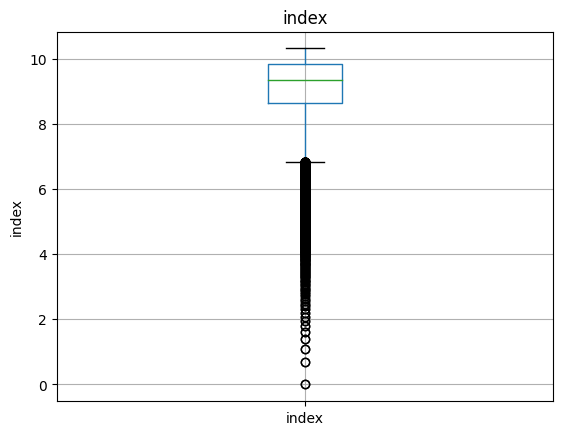

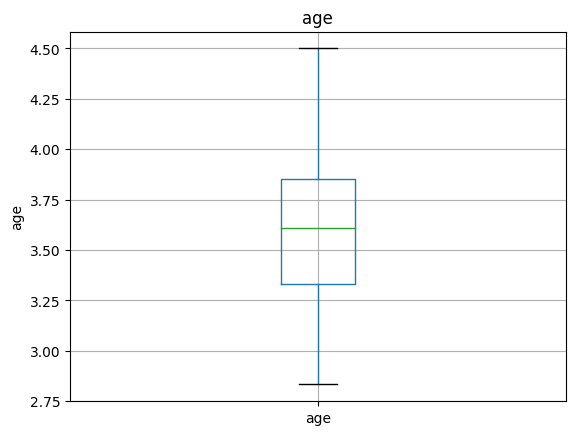

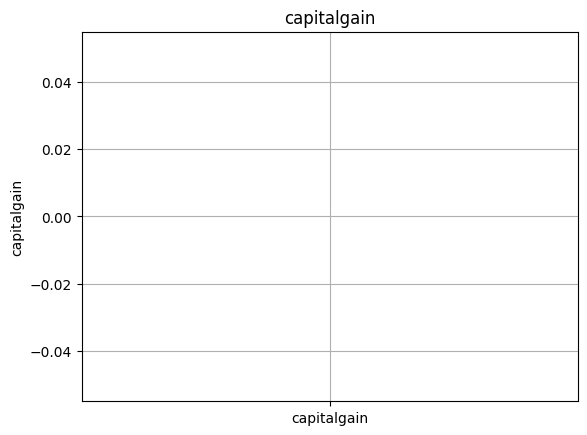

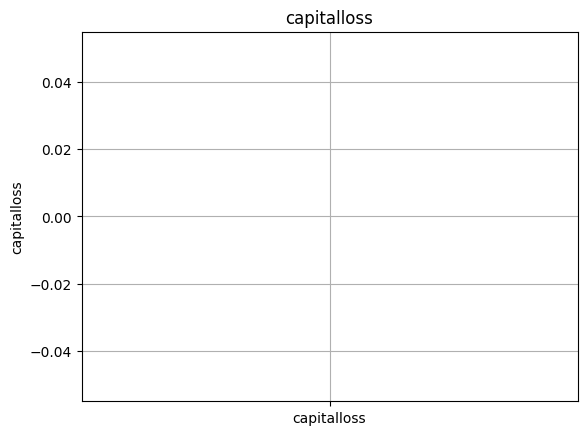

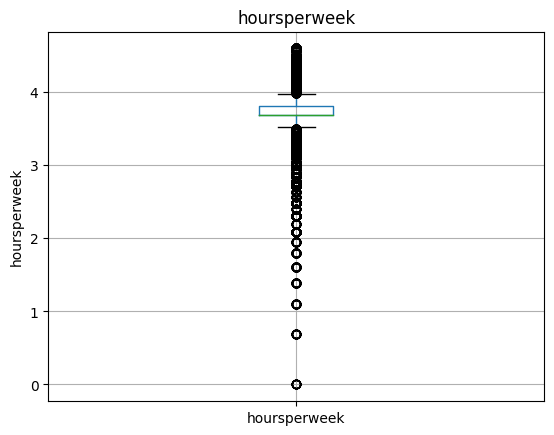

In [ ]:
#after log transformation
for feature in continuous_feature:
    data=rawdata.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


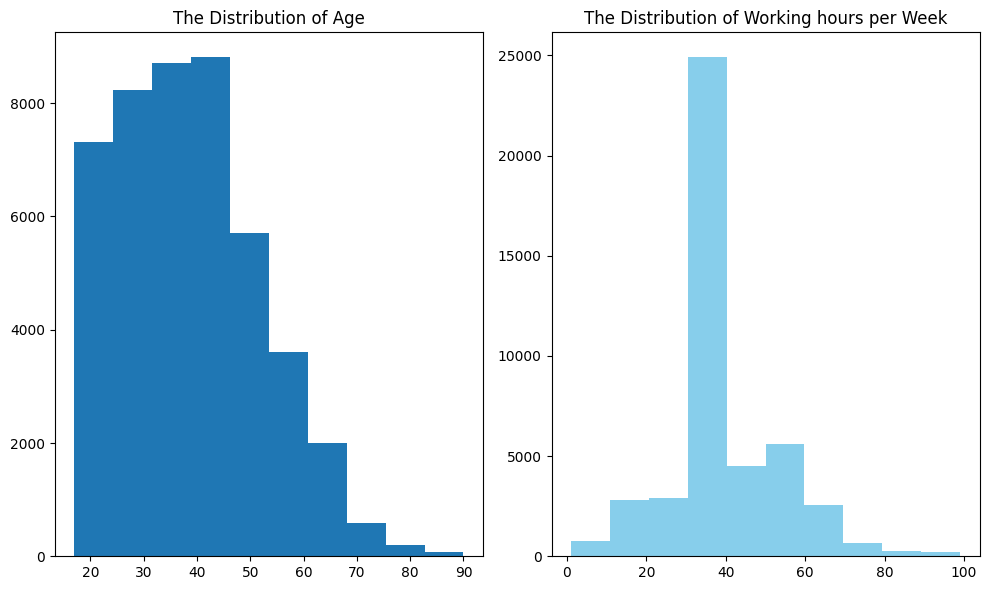

In [ ]:
#visualize the distribution
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1)
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(rawdata['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(rawdata['hoursperweek'], color = 'skyblue')
ra2.set_title('The Distribution of Working hours per Week')

plt.tight_layout()
plt.show()


In [ ]:
rawdata[['age','hoursperweek']].describe()

,age,hoursperweek
count,45221.000000,45221.000000
mean,38.548086,40.938038
std,13.217981,12.007640
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,47.000000,45.000000
max,90.000000,99.000000


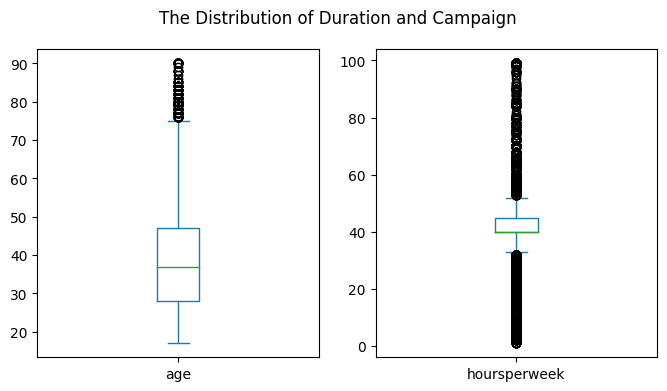

In [ ]:
df1 = rawdata.copy()
df1[['age','hoursperweek']].plot(kind = 'box',
                                              figsize = (8,4),
                                              subplots = True, layout = (1,2),
                                              sharex = False, sharey = False,
                                              title='The Distribution of Duration and Campaign')
plt.show()


In [ ]:
#age
b_df = pd.DataFrame()
b_df['age_wrt_salary_more_than_50k'] = (rawdata[rawdata['Salary'] == ' <=50K'][['Salary','age']].describe())['age']
b_df['age_wrt_salary_less_than_50k'] = (rawdata[rawdata['Salary'] == ' >50K'][['Salary','age']].describe())['age']

b_df


,age_wrt_salary_more_than_50k,age_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,36.749566,44.006067
std,13.564858,10.340502
min,17.000000,19.000000
25%,26.000000,36.000000
50%,34.000000,43.000000
75%,46.000000,51.000000
max,90.000000,90.000000


<Axes: title={'center': 'Age and Salary statistics'}>

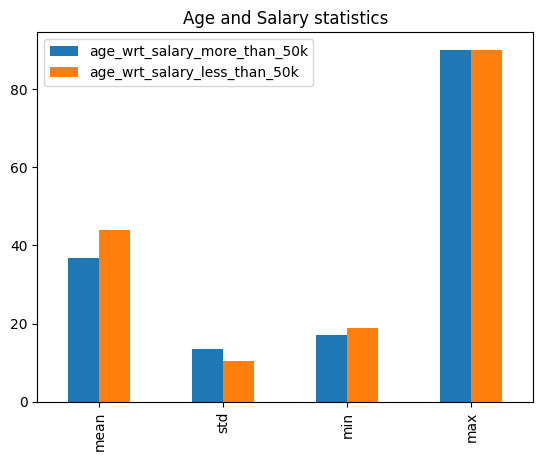

In [ ]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and Salary statistics')


In [ ]:
#capitalgain
a_df = pd.DataFrame()
a_df['capitalgain_wrt_salary_more_than_50k'] = (rawdata[rawdata['Salary'] == ' <=50K'][['Salary','capitalgain']].describe())['capitalgain']
a_df['capitalgain_wrt_salary_less_than_50k'] = (rawdata[rawdata['Salary'] == ' >50K'][['Salary','capitalgain']].describe())['capitalgain']
a_df


,capitalgain_wrt_salary_more_than_50k,capitalgain_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,149.027783,3991.791667
std,927.460669,14616.543746
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,41310.000000,99999.000000


<Axes: title={'center': 'Capital Gain and Salary statistics'}>

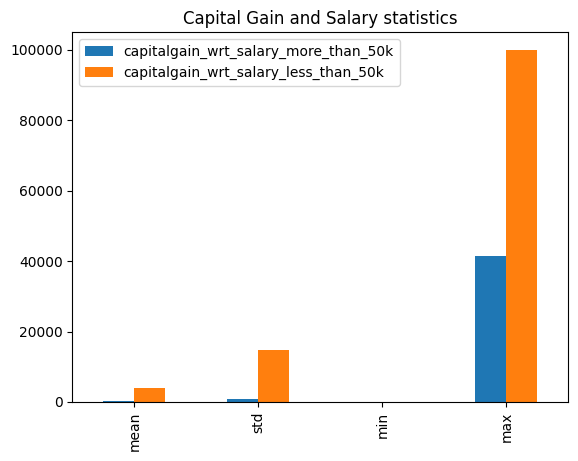

In [ ]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Capital Gain and Salary statistics')


In [ ]:
#capitalization
c_df = pd.DataFrame()
c_df['capitalloss_wrt_salary_more_than_50k'] = (rawdata[rawdata['Salary'] == ' <=50K'][['Salary','capitalloss']].describe())['capitalloss']
c_df['capitalloss_wrt_salary_less_than_50k'] = (rawdata[rawdata['Salary'] == ' >50K'][['Salary','capitalloss']].describe())['capitalloss']
c_df


,capitalloss_wrt_salary_more_than_50k,capitalloss_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,53.969188,193.487063
std,312.007128,592.642319
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,4356.000000,3683.000000


<Axes: title={'center': 'Capital Loss and Salary statistics'}>

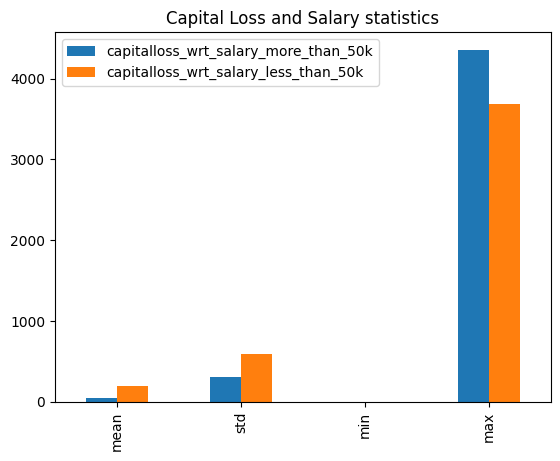

In [ ]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Capital Loss and Salary statistics')


In [ ]:
#hoursperweek
p_df = pd.DataFrame()
p_df['hoursperweek_wrt_salary_more_than_50k'] = (rawdata[rawdata['Salary'] == ' <=50K'][['Salary','hoursperweek']].describe())['hoursperweek']
p_df['hoursperweek_wrt_salary_less_than_50k'] = (rawdata[rawdata['Salary'] == ' >50K'][['Salary','hoursperweek']].describe())['hoursperweek']
p_df


,hoursperweek_wrt_salary_more_than_50k,hoursperweek_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,39.372005,45.690489
std,11.974303,10.797764
min,1.000000,1.000000
25%,37.000000,40.000000
50%,40.000000,40.000000
75%,40.000000,50.000000
max,99.000000,99.000000


<Axes: title={'center': 'Working Hours per Week and Salary statistics'}>

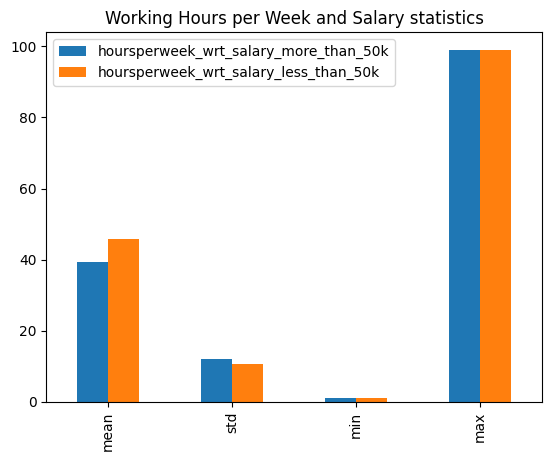

In [ ]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Working Hours per Week and Salary statistics')


In [ ]:
#for categorical variable
categorical_features=[feature for feature in rawdata.columns if rawdata[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
rawdata[categorical_features].head()



Number of Categorical Features: 9 
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [ ]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(rawdata[feature].unique()),feature))


7 number of unique categories in feature named workclass
16 number of unique categories in feature named education
7 number of unique categories in feature named maritalstatus
14 number of unique categories in feature named occupation
6 number of unique categories in feature named relationship
5 number of unique categories in feature named race
2 number of unique categories in feature named sex
40 number of unique categories in feature named native
2 number of unique categories in feature named Salary


In [ ]:
# Decide which categorical variables you want to use in model
for feature in rawdata.columns:
    if rawdata[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(rawdata[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(rawdata[feature].value_counts())
        print()


Feature 'workclass' has 7 unique categories
 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

Feature 'education' has 16 unique categories
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64

Feature 'maritalstatus' has 7 unique categories
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus,

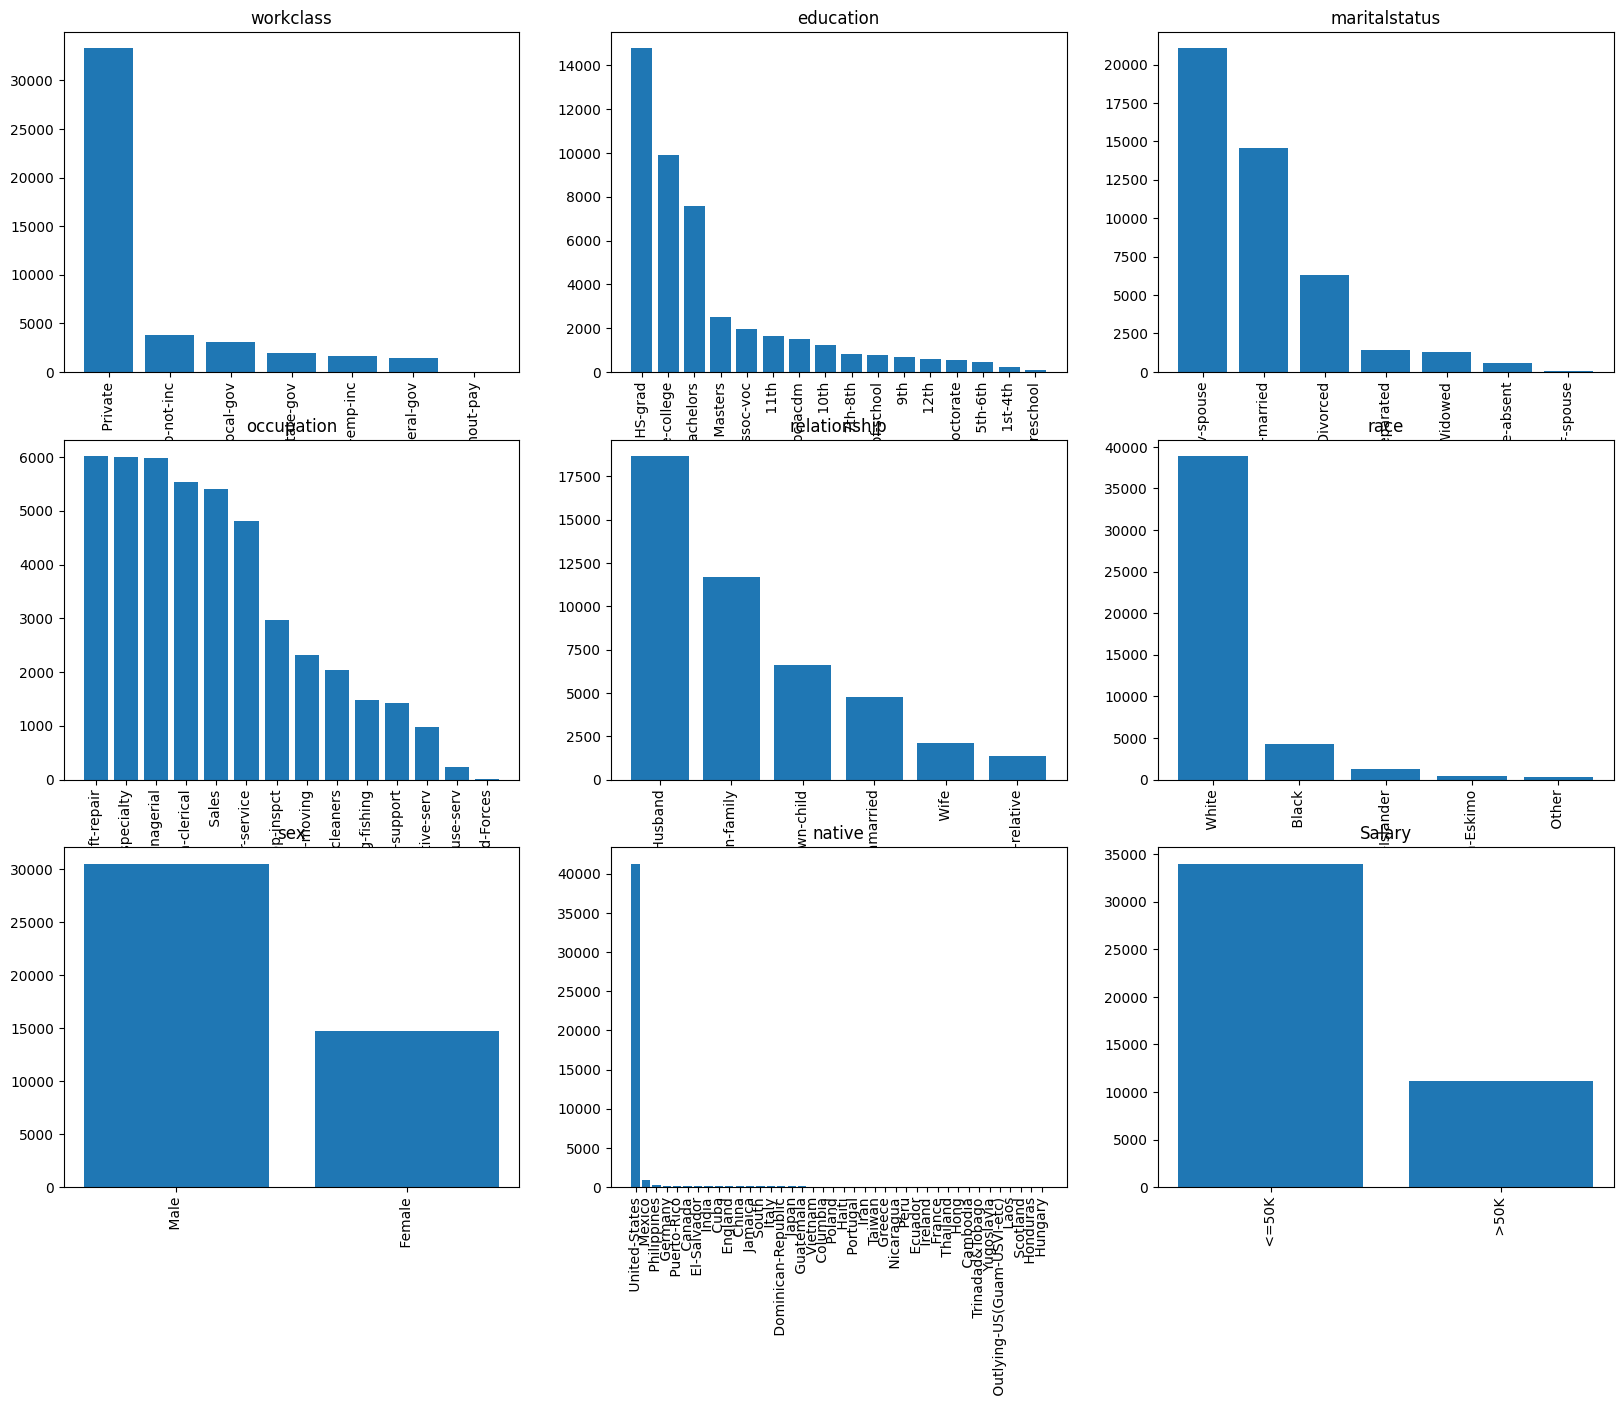

In [ ]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))
counter = 0
for cat_column in categorical_features:
    value_counts = rawdata[cat_column].value_counts()
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    axs[trace_x, trace_y].set_title(cat_column)
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    counter += 1
plt.show()

Text(0.5, 1.0, 'Working Class')

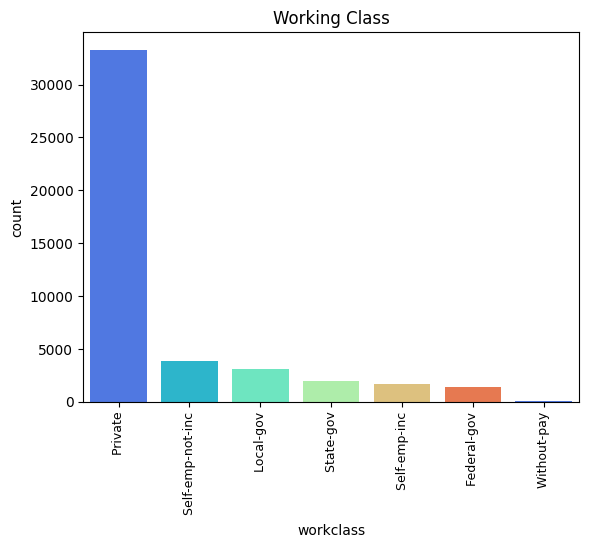

In [ ]:
pal = sns.color_palette('rainbow')
sns.countplot(x='workclass', data=rawdata, palette = pal,
              order=rawdata['workclass'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 9)
plt.title('Working Class')


Text(0.5, 1.0, 'Marital Status')

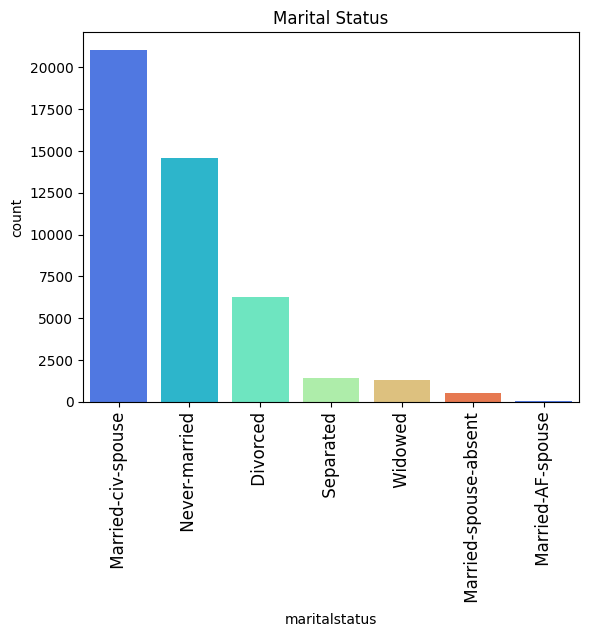

In [ ]:
sns.countplot(x='maritalstatus', data=rawdata, palette = pal,
              order=rawdata['maritalstatus'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Marital Status')


Text(0.5, 1.0, 'Education')

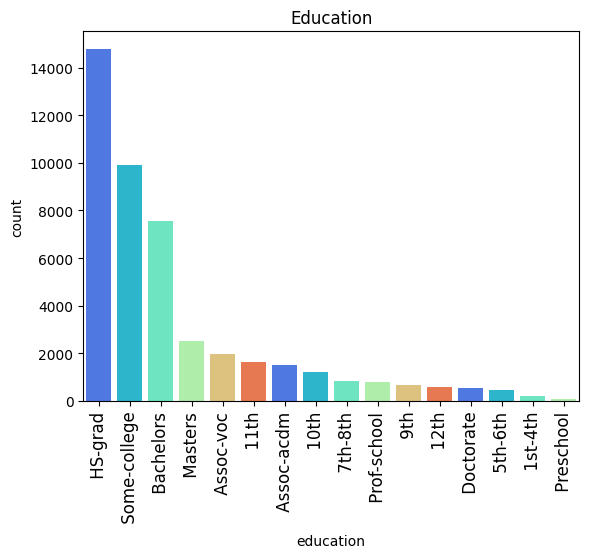

In [ ]:
sns.countplot(x='education', data=rawdata, palette = pal,
              order=rawdata['education'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Education')


Text(0.5, 1.0, 'Relationship')

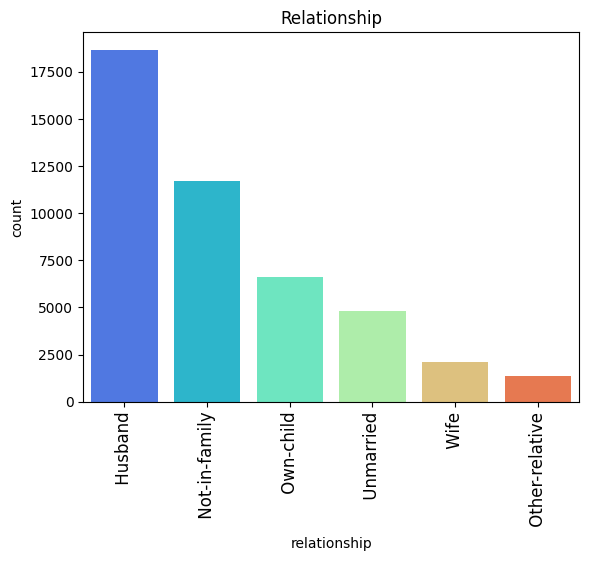

In [ ]:
sns.countplot(x='relationship', data=rawdata, palette = pal,
              order=rawdata['relationship'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Relationship')


Text(0.5, 1.0, 'Native')

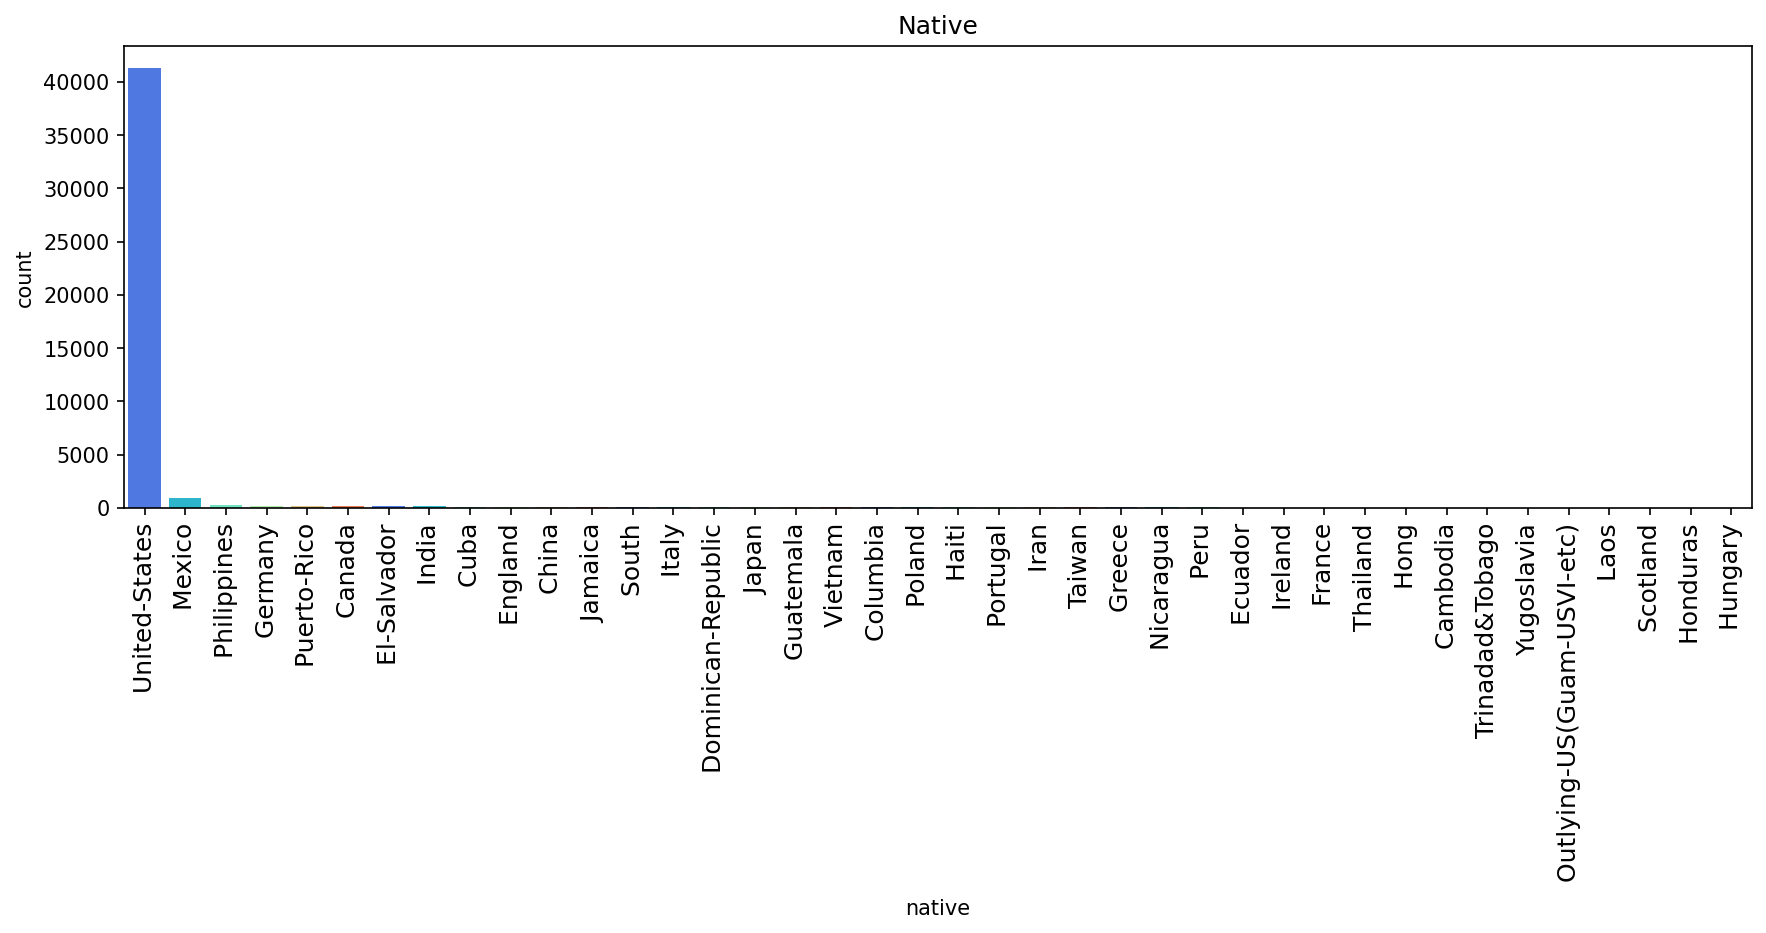

In [ ]:
plt.figure(figsize=(14,4),dpi=150)
sns.countplot(x='native', data=rawdata, palette = pal,
              order=rawdata['native'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Native')


In [ ]:
#analysis of response column

In [ ]:
countlessthanfiftyk = len(rawdata[rawdata.Salary == ' <=50K'])
countgreatthanfiftyk = len(rawdata[rawdata.Salary == ' >50K'])
print("Percentage of Employees with Salary greater than 50k: {:.2f}%".format((countgreatthanfiftyk / (len(rawdata.Salary))*100)))
print("Percentage of Employees with Salary lesser than 50k: {:.2f}%".format((countlessthanfiftyk / (len(rawdata.Salary))*100)))


Percentage of Employees with Salary greater than 50k: 24.78%
Percentage of Employees with Salary lesser than 50k: 75.22%


In [ ]:
rawdata.Salary.value_counts()


 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

Text(0.5, 1.0, 'Salary')

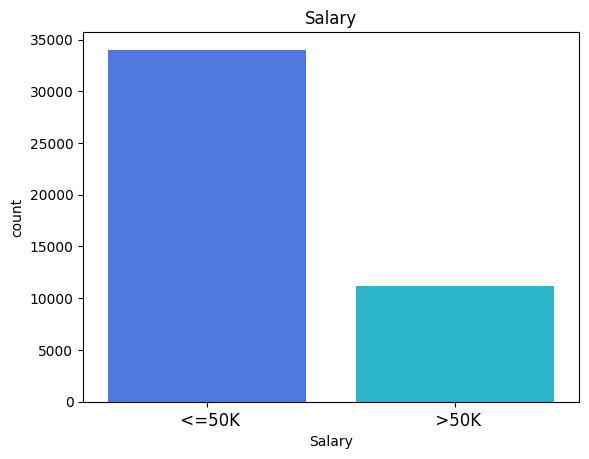

In [ ]:
pal = sns.color_palette('rainbow')
sns.countplot(x='Salary', data=rawdata, palette = pal,
              order=rawdata['Salary'].value_counts().index, );
plt.xticks(fontsize = 12)
plt.title('Salary')


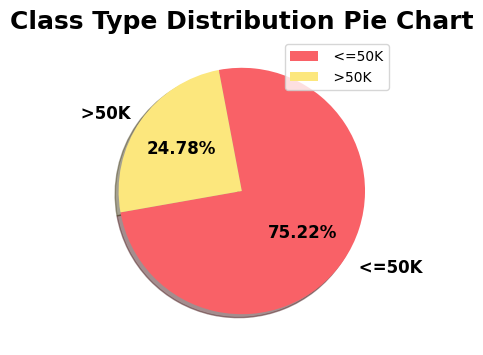

In [ ]:
plt.figure(figsize = (12,4))
plt.pie(rawdata['Salary'].value_counts(),
       labels=rawdata.Salary.unique(),
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()


<Axes: >

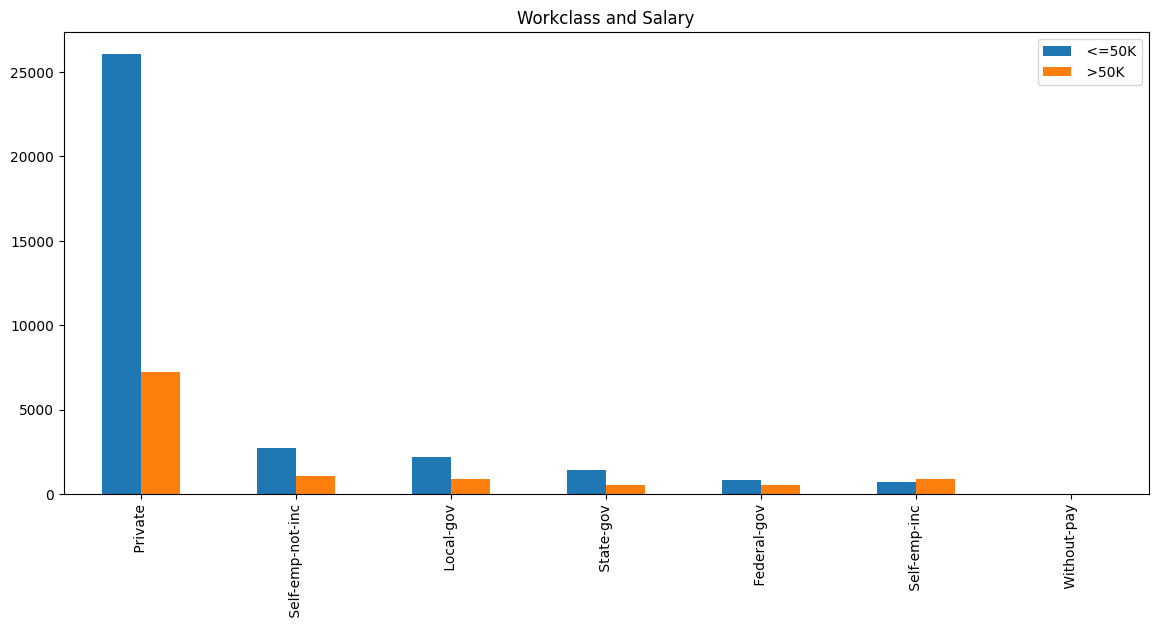

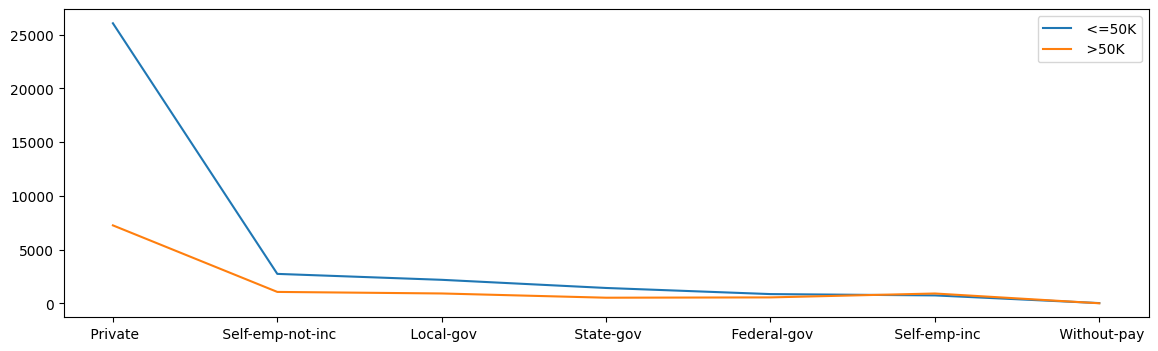

In [ ]:
#data visualization
#bivarient analysis
#workclass and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = rawdata[rawdata['Salary'] == ' <=50K']['workclass'].value_counts()
j_df[' >50K'] = rawdata[rawdata['Salary'] == ' >50K']['workclass'].value_counts()
j_df.plot.bar(title = 'Workclass and Salary',figsize=(14,6))
j_df.plot(figsize=(14,4))


<Axes: xlabel='Salary', ylabel='workclass'>

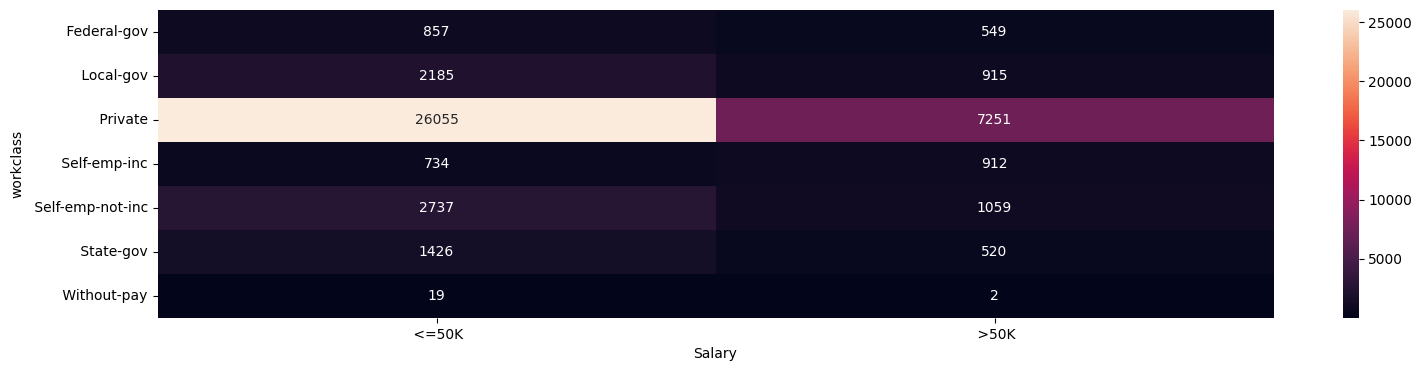

In [ ]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=rawdata['workclass'], columns=rawdata['Salary']), annot=True,
            fmt='g')


<Axes: >

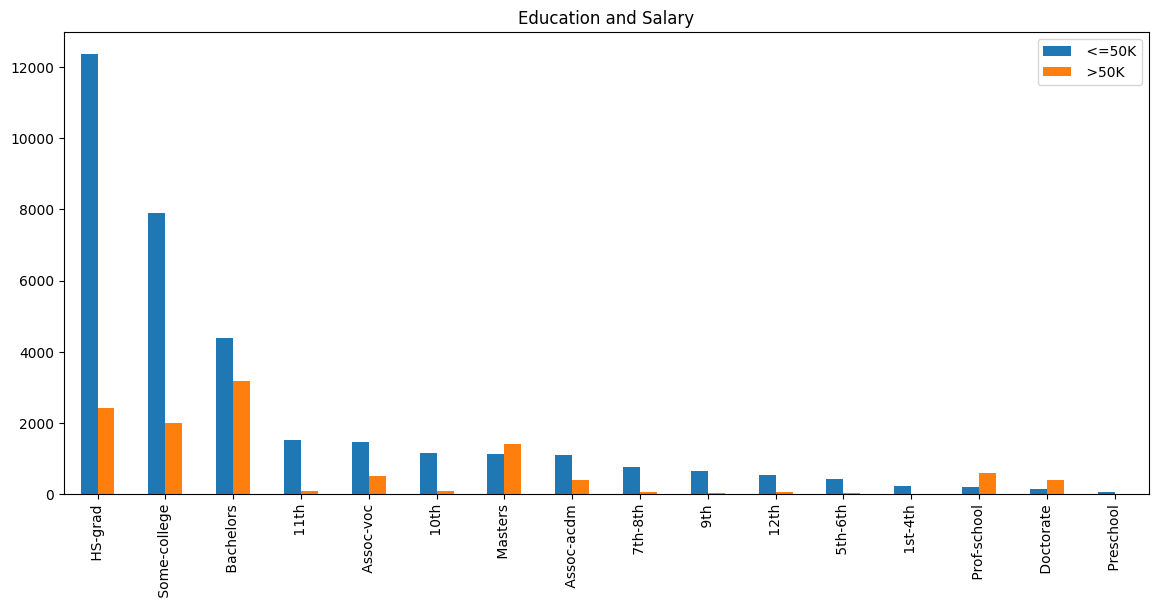

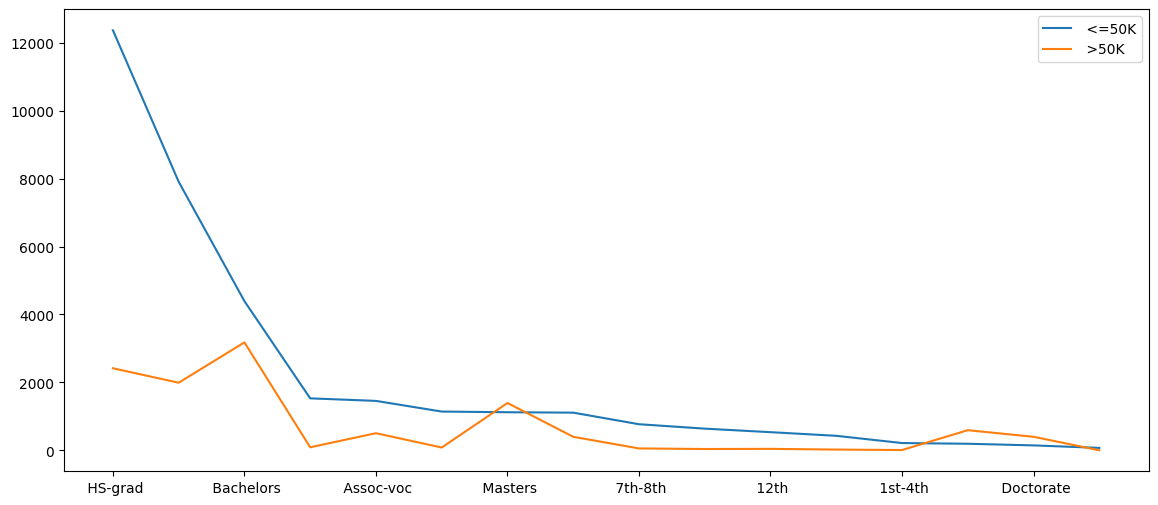

In [ ]:
#Education and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = rawdata[rawdata['Salary'] == ' <=50K']['education'].value_counts()
j_df[' >50K'] = rawdata[rawdata['Salary'] == ' >50K']['education'].value_counts()
j_df.plot.bar(title = 'Education and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))


<Axes: xlabel='Salary', ylabel='education'>

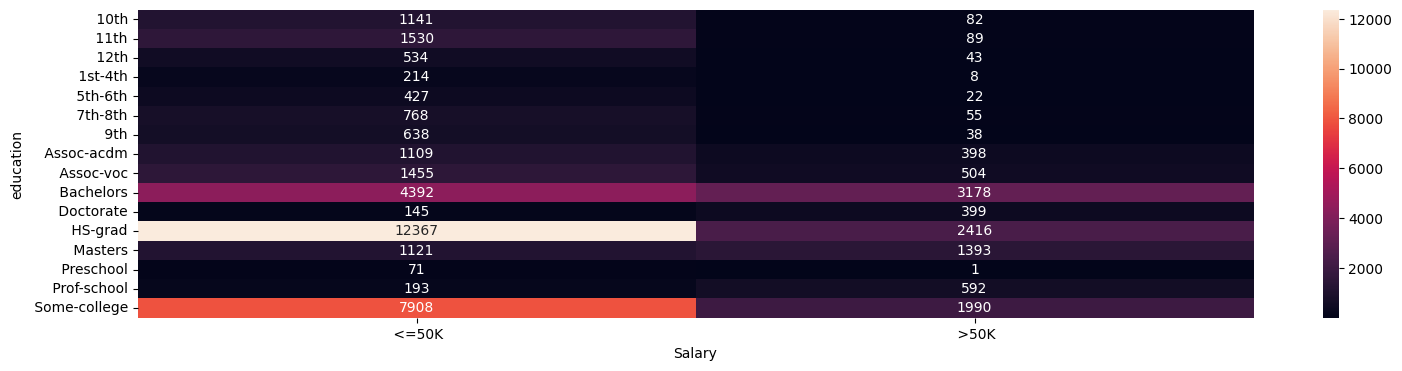

In [ ]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=rawdata['education'], columns=rawdata['Salary']), annot=True,
            fmt='g')


<Axes: >

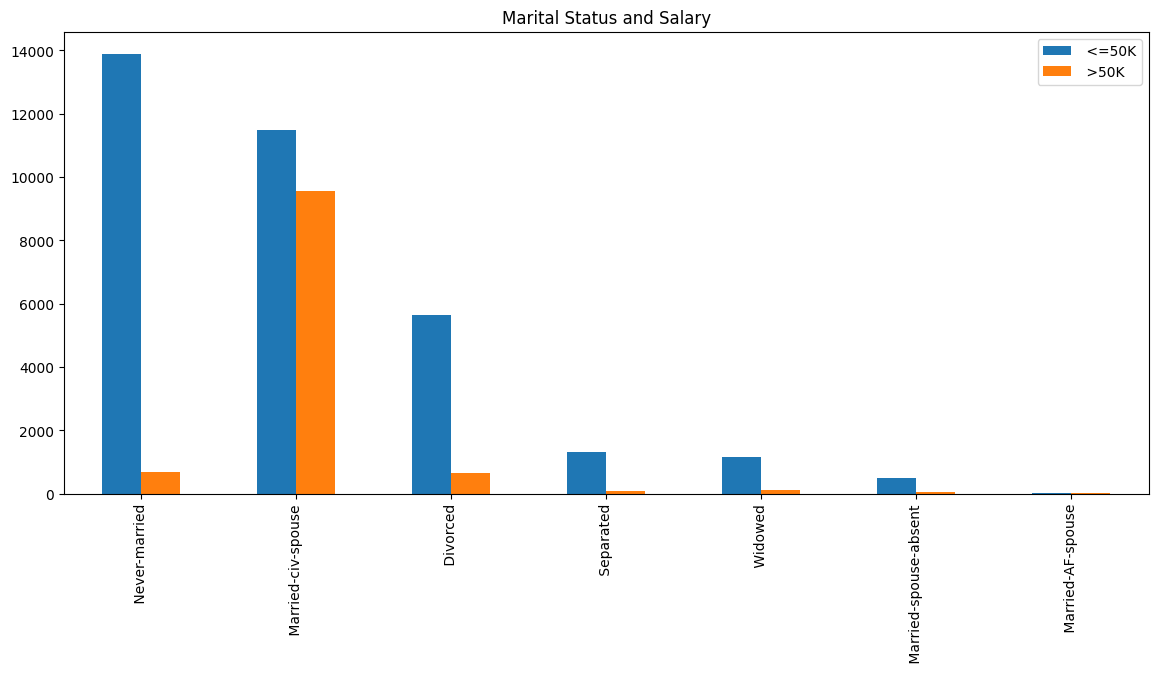

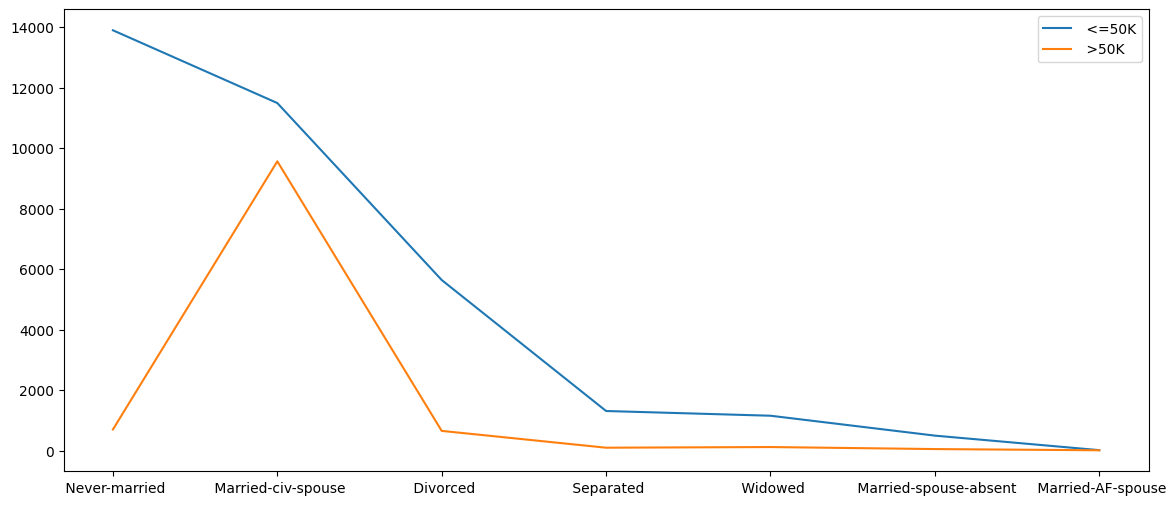

In [ ]:
#maritalstatus and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = rawdata[rawdata['Salary'] == ' <=50K']['maritalstatus'].value_counts()
j_df[' >50K'] = rawdata[rawdata['Salary'] == ' >50K']['maritalstatus'].value_counts()
j_df.plot.bar(title = 'Marital Status and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))


<Axes: xlabel='Salary', ylabel='maritalstatus'>

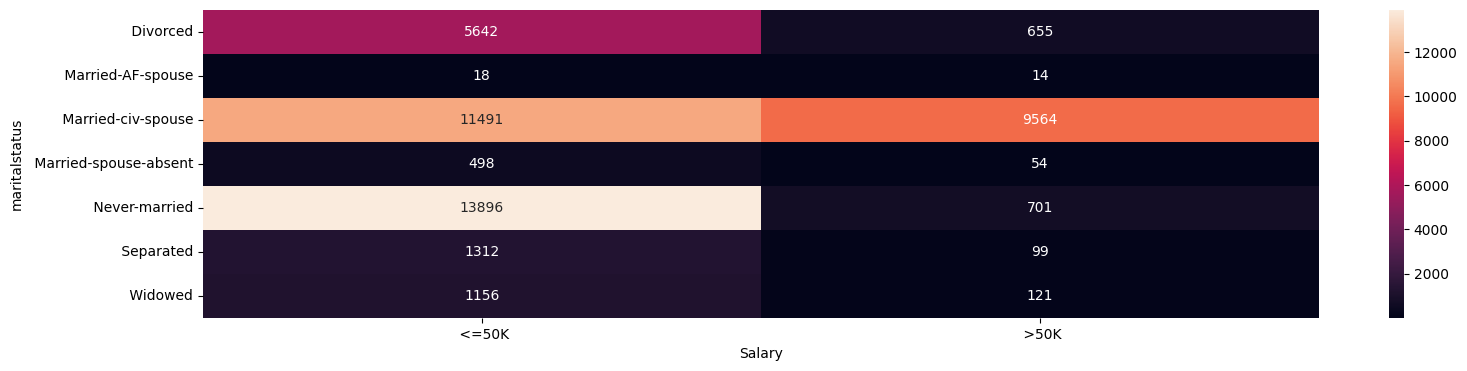

In [ ]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=rawdata['maritalstatus'], columns=rawdata['Salary']), annot=True,
            fmt='g')


<Axes: >

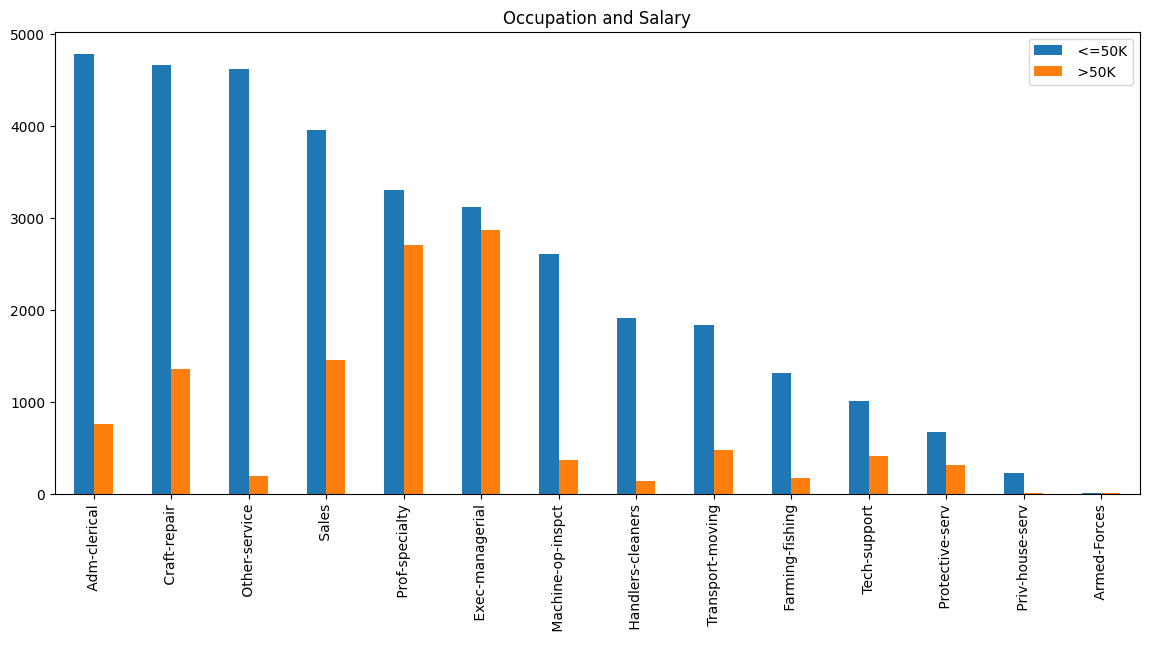

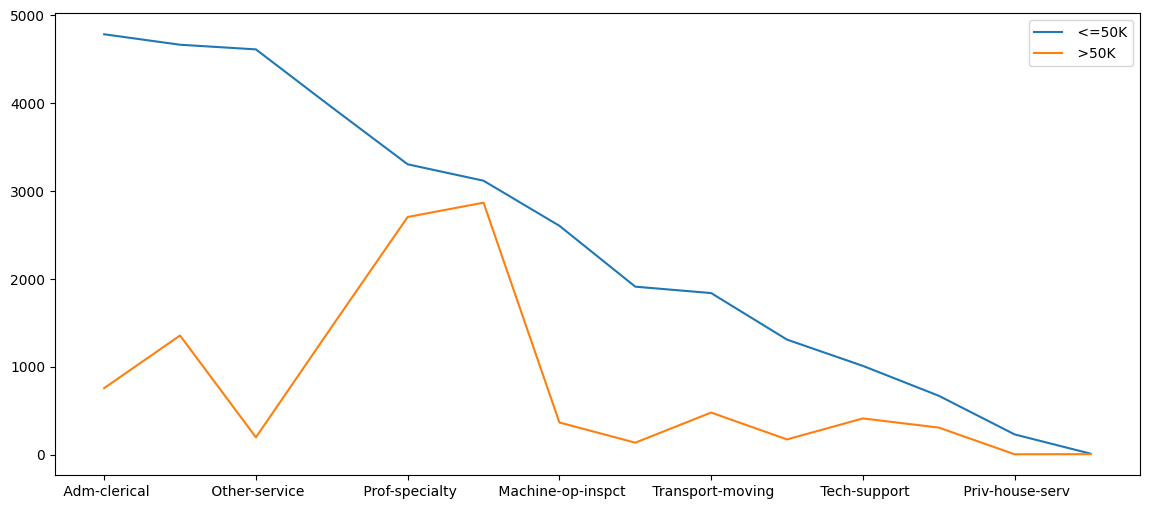

In [ ]:
#occupation and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = rawdata[rawdata['Salary'] == ' <=50K']['occupation'].value_counts()
j_df[' >50K'] = rawdata[rawdata['Salary'] == ' >50K']['occupation'].value_counts()
j_df.plot.bar(title = 'Occupation and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))


<Axes: xlabel='Salary', ylabel='occupation'>

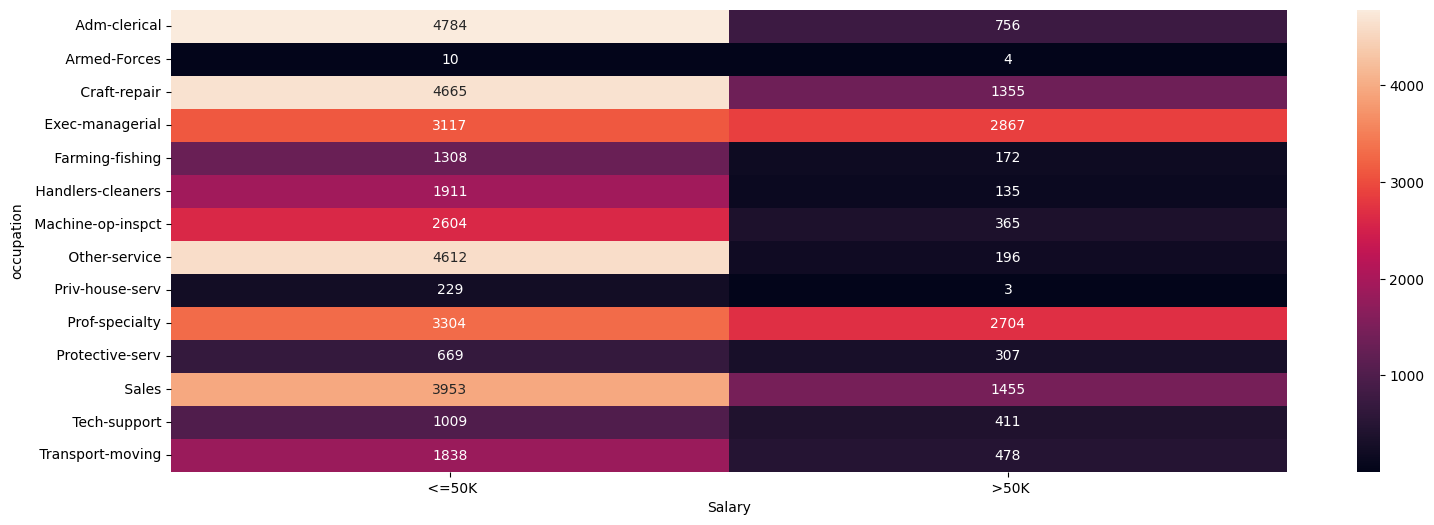

In [ ]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=rawdata['occupation'], columns=rawdata['Salary']), annot=True,
            fmt='g')


<Axes: >

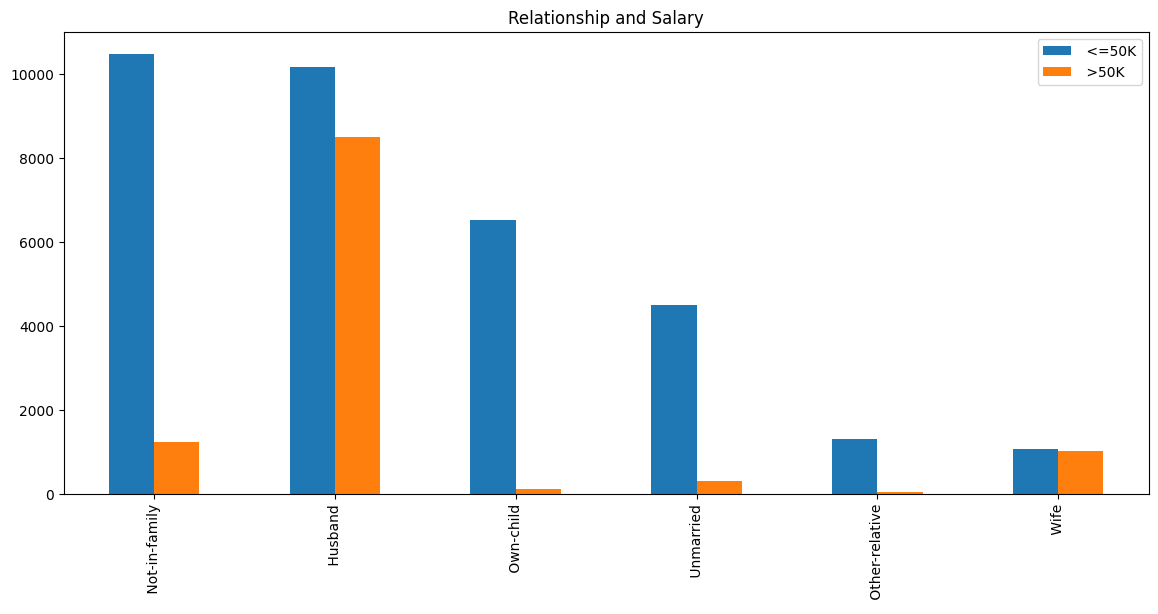

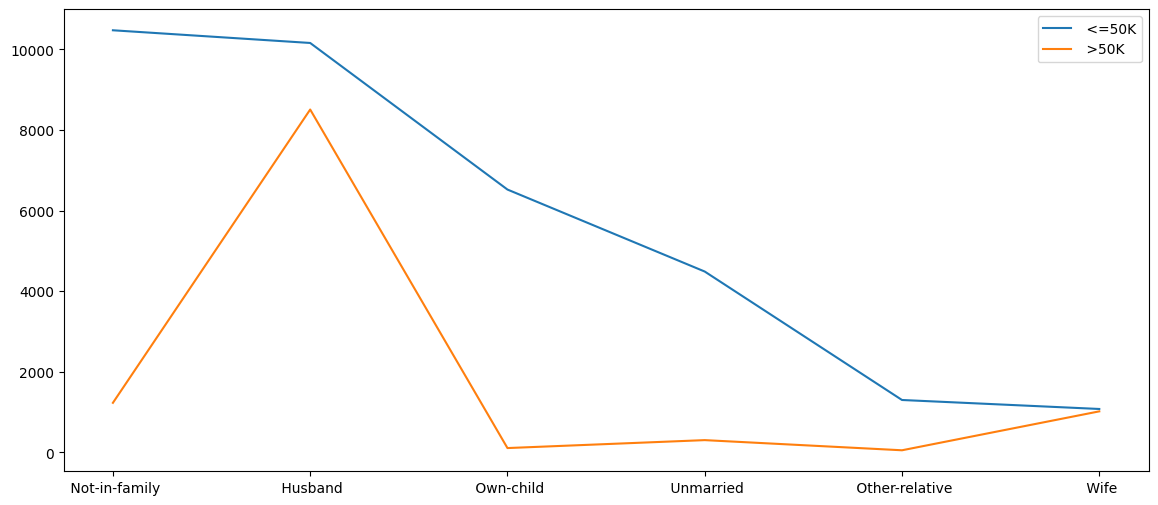

In [ ]:
#relationship and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = rawdata[rawdata['Salary'] == ' <=50K']['relationship'].value_counts()
j_df[' >50K'] = rawdata[rawdata['Salary'] == ' >50K']['relationship'].value_counts()
j_df.plot.bar(title = 'Relationship and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))


<Axes: xlabel='Salary', ylabel='relationship'>

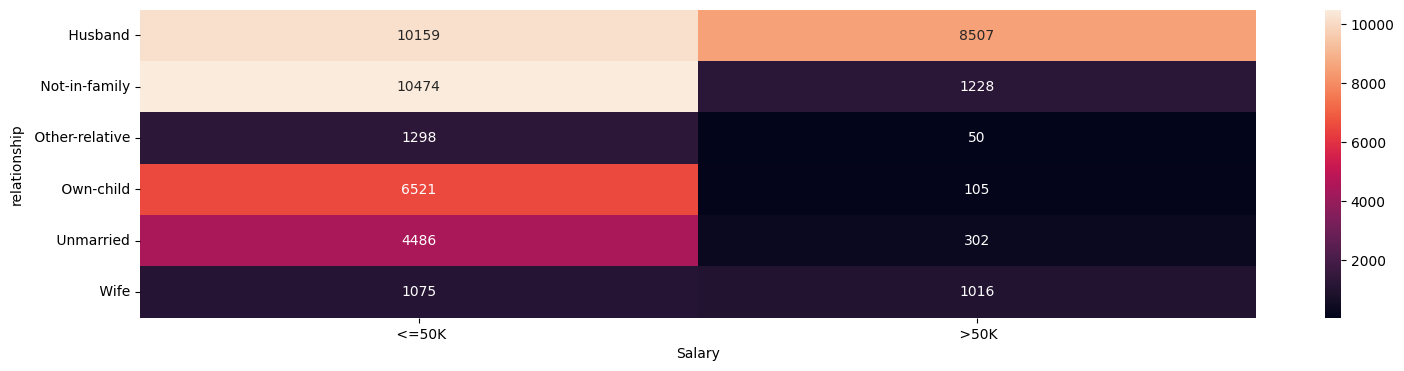

In [ ]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=rawdata['relationship'], columns=rawdata['Salary']), annot=True,
            fmt='g')


<Axes: >

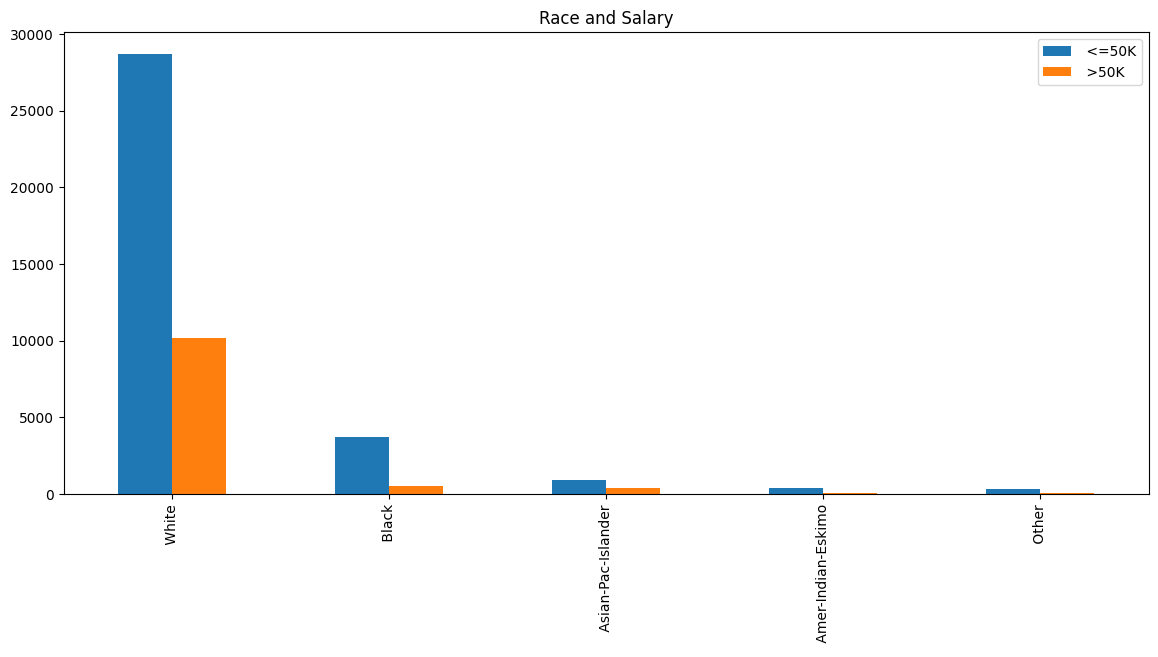

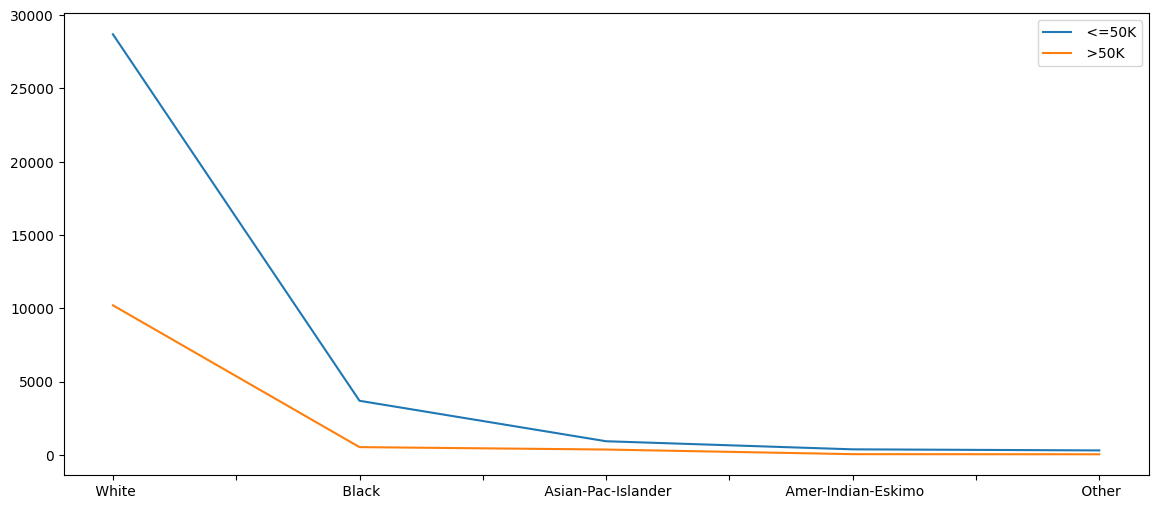

In [ ]:
#Race and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = rawdata[rawdata['Salary'] == ' <=50K']['race'].value_counts()
j_df[' >50K'] = rawdata[rawdata['Salary'] == ' >50K']['race'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))


<Axes: xlabel='Salary', ylabel='race'>

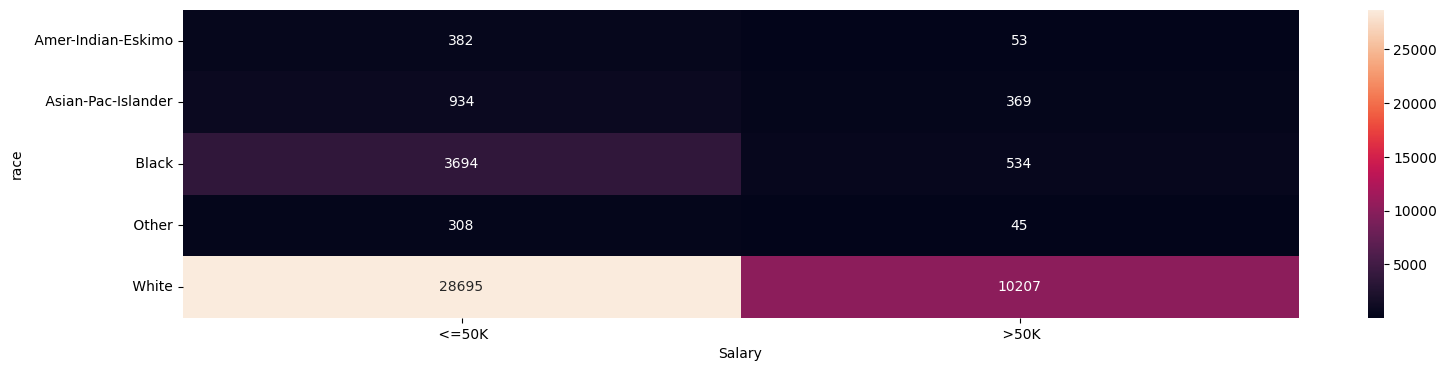

In [ ]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=rawdata['race'], columns=rawdata['Salary']), annot=True,
            fmt='g')


<Axes: >

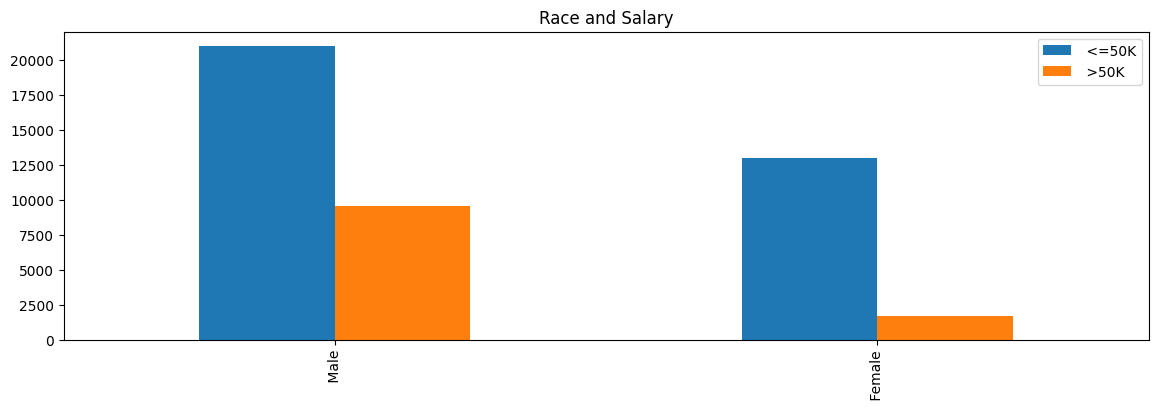

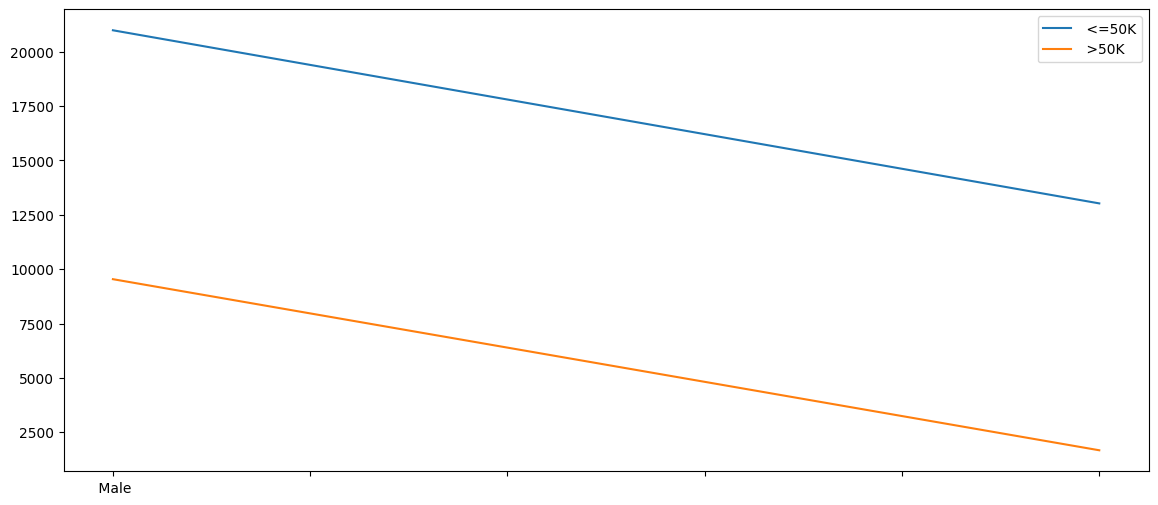

In [ ]:
#Sex and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = rawdata[rawdata['Salary'] == ' <=50K']['sex'].value_counts()
j_df[' >50K'] = rawdata[rawdata['Salary'] == ' >50K']['sex'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,4))
j_df.plot(figsize=(14,6))


<Axes: xlabel='Salary', ylabel='sex'>

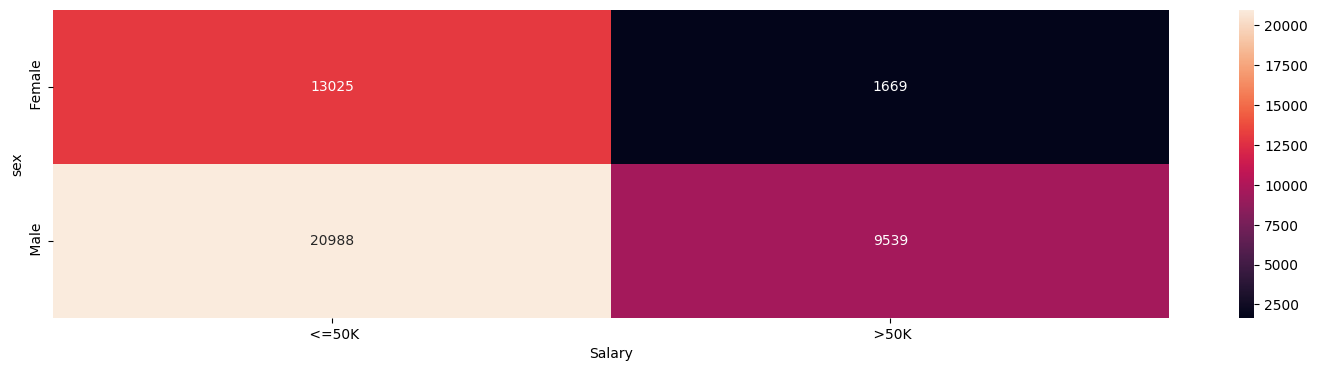

In [ ]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=rawdata['sex'], columns=rawdata['Salary']), annot=True,
            fmt='g')


<Axes: >

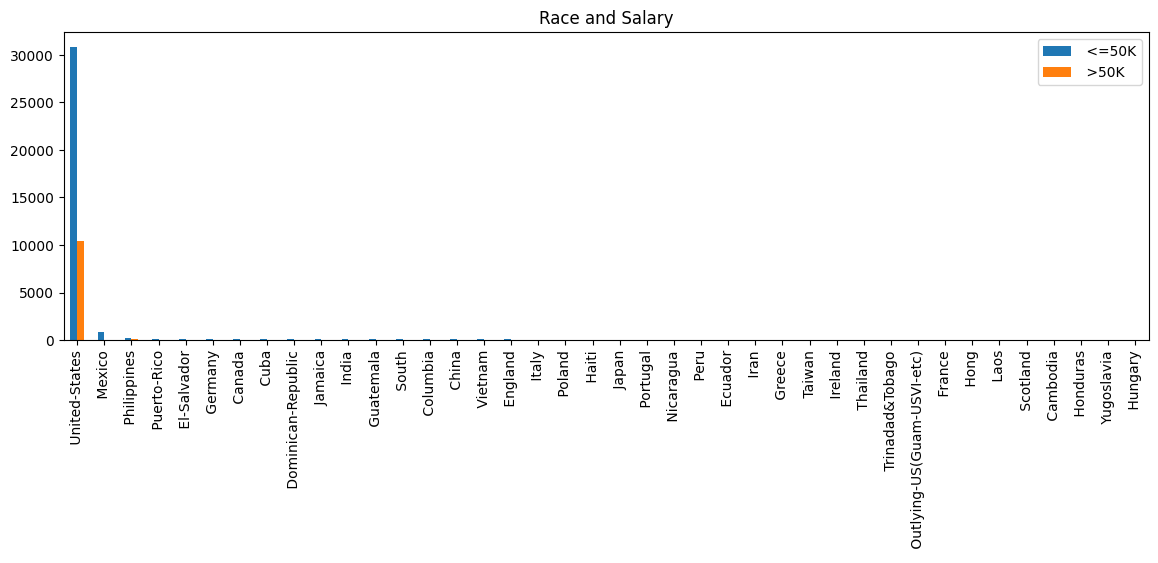

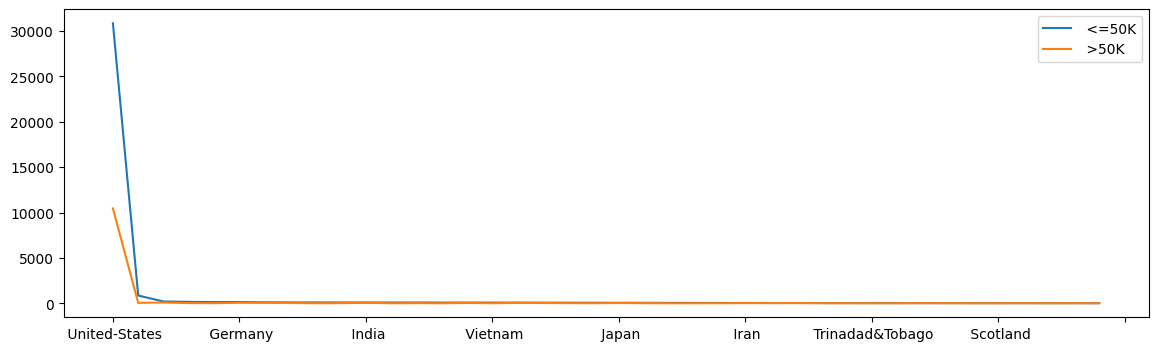

In [ ]:
#Native and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = rawdata[rawdata['Salary'] == ' <=50K']['native'].value_counts()
j_df[' >50K'] = rawdata[rawdata['Salary'] == ' >50K']['native'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,4))
j_df.plot(figsize=(14,4))


<Axes: xlabel='Salary', ylabel='native'>

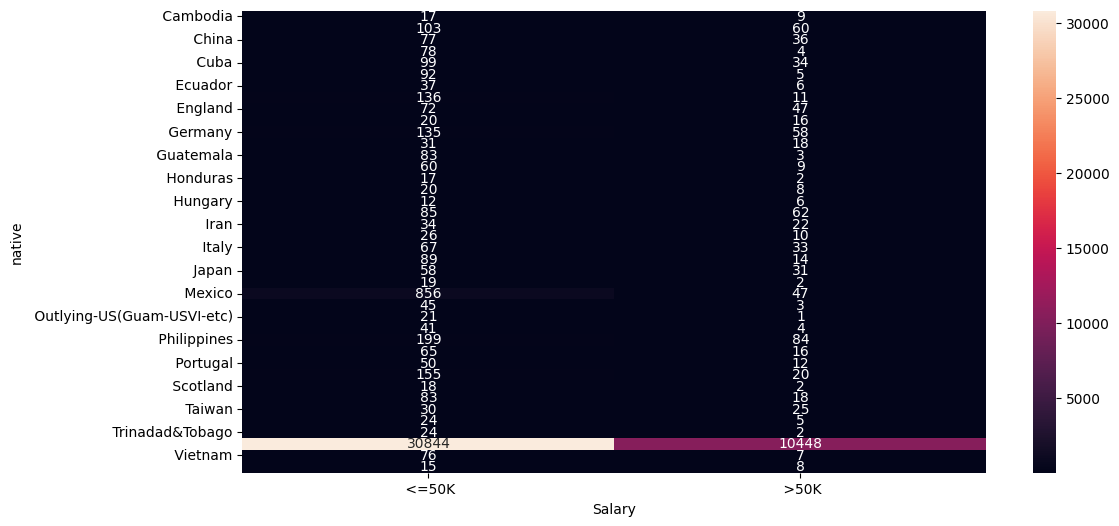

In [ ]:
fig= plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(index=rawdata['native'], columns=rawdata['Salary']), annot=True,
            fmt='g')


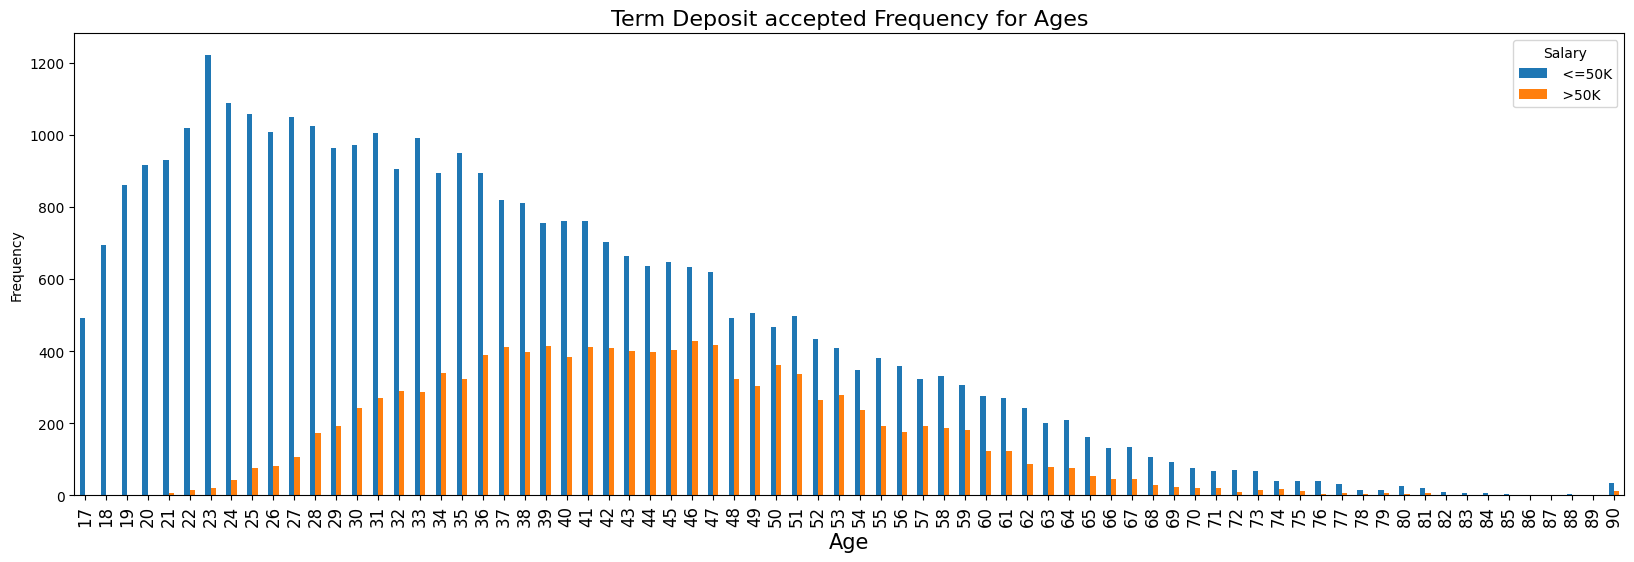

In [ ]:
#analyse the relation by ploting contineous feature with the targeted feature
pd.crosstab(rawdata.age,rawdata.Salary).plot(kind="bar",figsize=(20,6))
plt.title('Term Deposit accepted Frequency for Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()


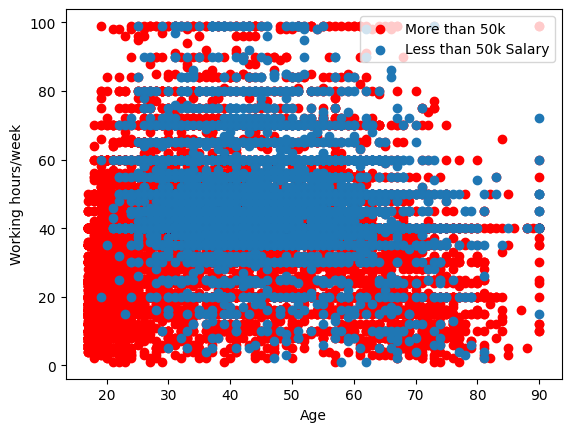

In [ ]:
plt.scatter(x=rawdata.age[rawdata.Salary== ' <=50K'], y=rawdata.hoursperweek[(rawdata.Salary== ' <=50K')], c="red")
plt.scatter(x=rawdata.age[rawdata.Salary== ' >50K'], y=rawdata.hoursperweek[(rawdata.Salary== ' >50K')])
plt.legend(["More than 50k", "Less than 50k Salary"])
plt.xlabel("Age")
plt.ylabel("Working hours/week")
plt.show()


In [ ]:
#visualize the salary and employee rate by age
rawdata.age.value_counts()

36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
88       5
85       5
86       1
89       1
87       1
Name: age, Length: 74, dtype: int64

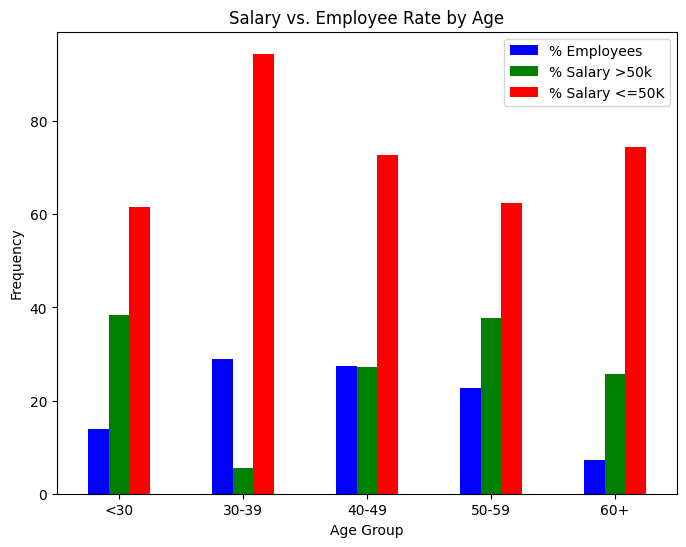

In [ ]:
lst = [rawdata]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

count_age_response_pct = pd.crosstab(rawdata['Salary'],rawdata['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

age = pd.DataFrame(rawdata['age_group'].value_counts())
age['% Employees'] = age['age_group']*100/age['age_group'].sum()
age['% Salary >50k'] = count_age_response_pct[' >50K']
age['% Salary <=50K'] = count_age_response_pct[' <=50K']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Employees','% Salary >50k','% Salary <=50K']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('blue','green','red'))
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Salary vs. Employee Rate by Age')
plt.show()


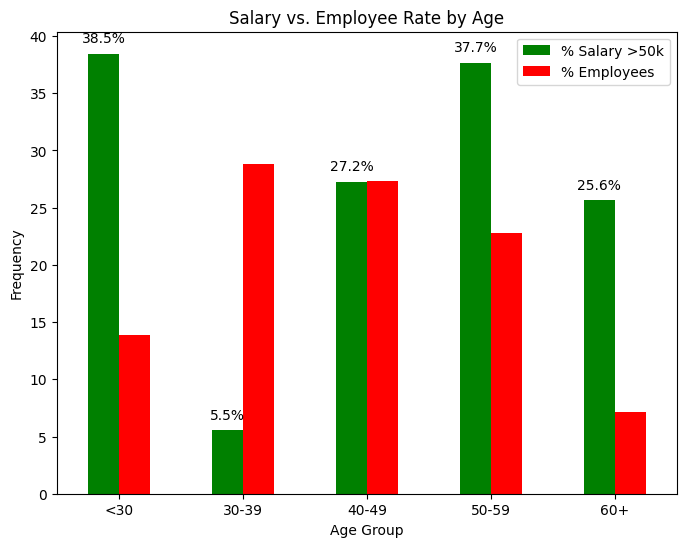

In [ ]:
lst = [rawdata]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

count_age_response_pct = pd.crosstab(rawdata['Salary'],rawdata['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

age = pd.DataFrame(rawdata['age_group'].value_counts())
age['% Employees'] = age['age_group']*100/age['age_group'].sum()
age['% Salary >50k'] = count_age_response_pct[' >50K']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Salary >50k','% Employees']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Salary vs. Employee Rate by Age')

# label the bar
for rec, label in zip(plot_age.patches,
                      age['% Salary >50k'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2,
                      rec.get_height() + 1,
                      label+'%',
                      ha = 'center',
                      color = 'black')


In [ ]:
#visualizing the salary for 50k by working hours per week
rawdata.hoursperweek.describe()


count    45221.000000
mean        40.938038
std         12.007640
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hoursperweek, dtype: float64

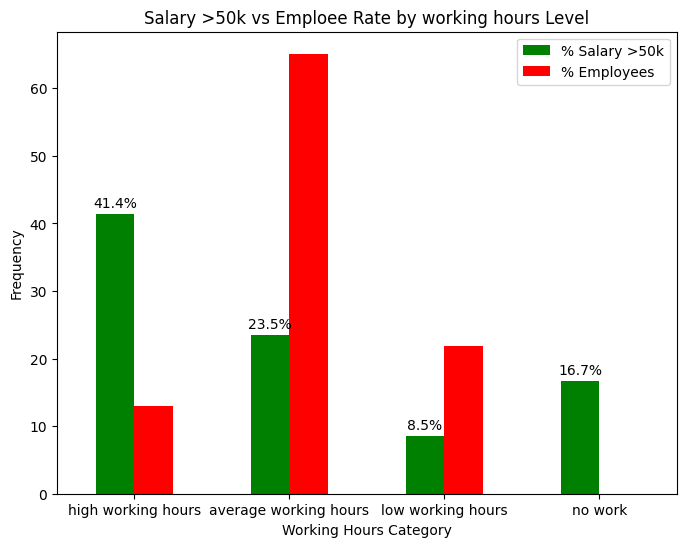

In [ ]:
lst = [rawdata]
for column in lst:
    column.loc[column["hoursperweek"] <= 1,  'hour_group'] = 'no work'
    column.loc[(column["hoursperweek"] > 1) & (column["hoursperweek"] <= 35), 'hour_group'] = 'low working hours'
    column.loc[(column["hoursperweek"] > 35) & (column["hoursperweek"] <= 45), 'hour_group'] = 'average working hours'
    column.loc[(column["hoursperweek"] > 50), 'hour_group'] = 'high working hours'

count_balance_response_pct = pd.crosstab(rawdata['Salary'],rawdata['hour_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(rawdata['hour_group'].value_counts())
bal['% Employees'] = bal['hour_group']*100/bal['hour_group'].sum()
bal['% Salary >50k'] = count_balance_response_pct[' >50K']
bal.drop('hour_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Salary >50k','% Employees']].plot(kind = 'bar',
                                               color = ('green','red'),
                                               figsize = (8,6))

plt.title('Salary >50k vs Emploee Rate by working hours Level')
plt.ylabel('Frequency')
plt.xlabel('Working Hours Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Salary >50k'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2,
                      rec.get_height() + 1,
                      label+'%',
                      ha = 'center',
                      color = 'black')


In [ ]:
count_job_response_pct = pd.crosstab(rawdata['Salary'],rawdata['workclass']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct


workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Salary,,,,,,,
<=50K,60.953058,70.483871,78.229148,44.592953,72.102213,73.27852,90.47619
>50K,39.046942,29.516129,21.770852,55.407047,27.897787,26.72148,9.52381


In [ ]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct


Salary,<=50K,>50K
workclass,,
Federal-gov,60.953058,39.046942
Local-gov,70.483871,29.516129
Private,78.229148,21.770852
Self-emp-inc,44.592953,55.407047
Self-emp-not-inc,72.102213,27.897787
State-gov,73.278520,26.721480
Without-pay,90.476190,9.523810


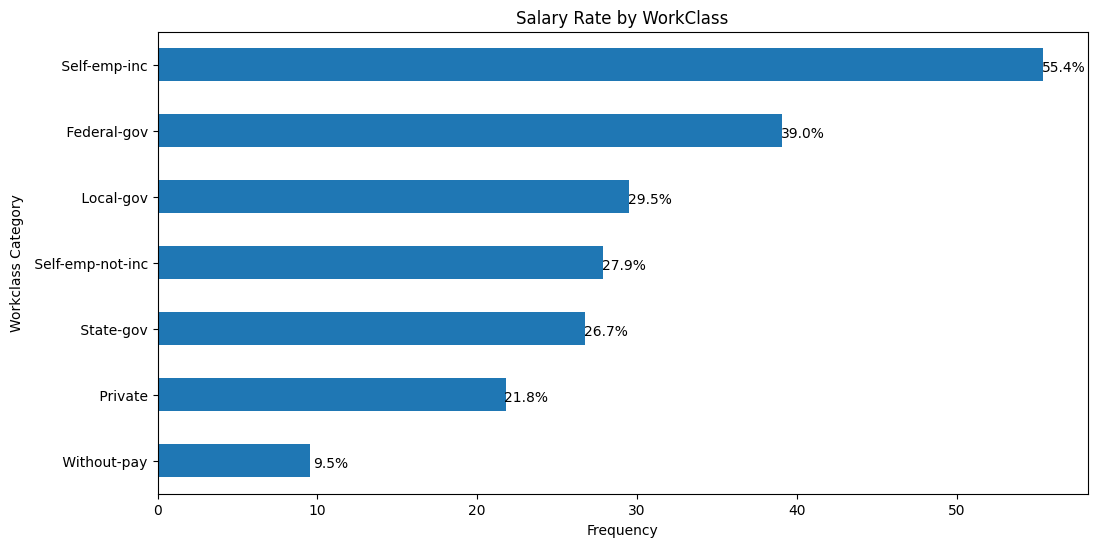

In [ ]:
plot_job = count_job_response_pct[' >50K'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))

plt.title('Salary Rate by WorkClass')
plt.xlabel('Frequency')
plt.ylabel('Workclass Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3,
                  rec.get_y()+ rec.get_height()-0.4,
                  label+'%',
                  ha = 'center',
                  va='bottom')


In [ ]:
#visualize the salary rate bby education
count_job_response_pct = pd.crosstab(rawdata['Salary'],rawdata['education']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct


education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
Salary,,,,,,,,,,,,,,,,
<=50K,93.295176,94.502779,92.54766,96.396396,95.100223,93.317132,94.378698,73.589914,74.272588,58.018494,26.654412,83.656903,44.590294,98.611111,24.585987,79.894928
>50K,6.704824,5.497221,7.45234,3.603604,4.899777,6.682868,5.621302,26.410086,25.727412,41.981506,73.345588,16.343097,55.409706,1.388889,75.414013,20.105072


In [ ]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

Salary,<=50K,>50K
education,,
10th,93.295176,6.704824
11th,94.502779,5.497221
12th,92.547660,7.452340
1st-4th,96.396396,3.603604
5th-6th,95.100223,4.899777
7th-8th,93.317132,6.682868
9th,94.378698,5.621302
Assoc-acdm,73.589914,26.410086
Assoc-voc,74.272588,25.727412


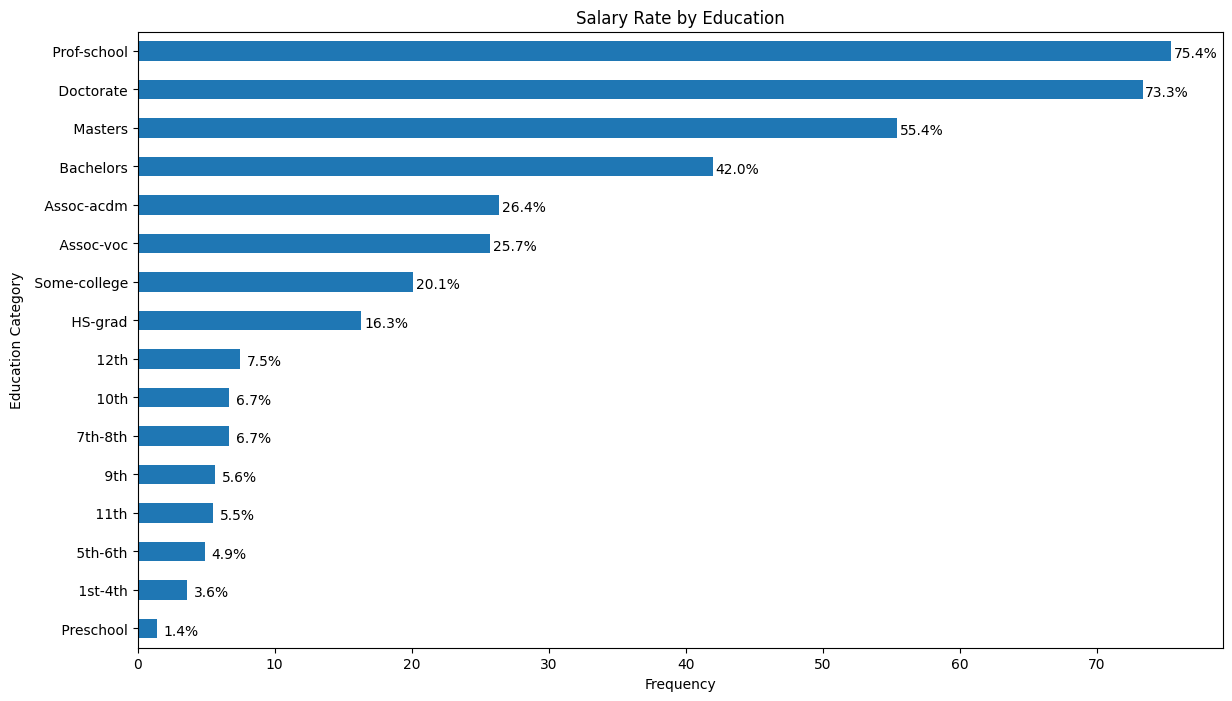

In [ ]:
plot_job = count_job_response_pct[' >50K'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (14,8))

plt.title('Salary Rate by Education')
plt.xlabel('Frequency')
plt.ylabel('Education Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.8,
                  rec.get_y()+ rec.get_height()-0.5,
                  label+'%',
                  ha = 'center',
                  va='bottom')


In [ ]:
#cleaning the data set
rawdata.head()

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_group,hour_group
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30.0,average working hours
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50.0,low working hours
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30.0,average working hours
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50.0,average working hours
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20.0,average working hours


In [ ]:
data_ = rawdata.copy()
data_.drop('Salary',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:])
data_.head()


,index,age,educationno,capitalgain,capitalloss,hoursperweek,age_group,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,hour_group_average working hours,hour_group_high working hours,hour_group_low working hours,hour_group_no work
0,0,39,13,2174,0,40,30.0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,50,13,0,0,13,50.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,38,9,0,0,40,30.0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,3,53,7,0,0,40,50.0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,4,28,13,0,0,40,20.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
data_['Salary'] = rawdata.Salary
data_.head()


,index,age,educationno,capitalgain,capitalloss,hoursperweek,age_group,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,hour_group_average working hours,hour_group_high working hours,hour_group_low working hours,hour_group_no work,Salary
0,0,39,13,2174,0,40,30.0,0,0,0,...,0,0,1,0,0,1,0,0,0,<=50K
1,1,50,13,0,0,13,50.0,0,0,0,...,0,0,1,0,0,0,0,1,0,<=50K
2,2,38,9,0,0,40,30.0,0,0,1,...,0,0,1,0,0,1,0,0,0,<=50K
3,3,53,7,0,0,40,50.0,0,0,1,...,0,0,1,0,0,1,0,0,0,<=50K
4,4,28,13,0,0,40,20.0,0,0,1,...,0,0,0,0,0,1,0,0,0,<=50K


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
le.fit(data_["Salary"])
data_["Salary"]=le.transform(data_["Salary"])
data_.head()


,index,age,educationno,capitalgain,capitalloss,hoursperweek,age_group,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,hour_group_average working hours,hour_group_high working hours,hour_group_low working hours,hour_group_no work,Salary
0,0,39,13,2174,0,40,30.0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,50,13,0,0,13,50.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2,38,9,0,0,40,30.0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,3,53,7,0,0,40,50.0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,4,28,13,0,0,40,20.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#label encoding technique
# Label Encoding of categrical variables
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df= rawdata.copy()
df["education"]=label_encoder.fit_transform(df["education"])
df["workclass"]=label_encoder.fit_transform(df["workclass"])
df["maritalstatus"]=label_encoder.fit_transform(df["maritalstatus"])
df["sex"]=label_encoder.fit_transform(df["sex"])
df["race"]=label_encoder.fit_transform(df["race"])
df["occupation"]=label_encoder.fit_transform(df["occupation"])
df["relationship"]=label_encoder.fit_transform(df["relationship"])
df["native"]=label_encoder.fit_transform(df["native"])
df['Salary'] = np.where(df['Salary'].str.contains(" >50K"), 1, 0)

df.head(10)


,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_group,hour_group
0,0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0,30.0,average working hours
1,1,50,4,9,13,2,3,0,4,1,0,0,13,37,0,50.0,low working hours
2,2,38,2,11,9,0,5,1,4,1,0,0,40,37,0,30.0,average working hours
3,3,53,2,1,7,2,5,0,2,1,0,0,40,37,0,50.0,average working hours
4,4,28,2,9,13,2,9,5,2,0,0,0,40,4,0,20.0,average working hours
5,5,37,2,12,14,2,3,5,4,0,0,0,40,37,0,30.0,average working hours
6,6,49,2,6,5,3,7,1,2,0,0,0,16,21,0,40.0,low working hours
7,7,52,4,11,9,2,3,0,4,1,0,0,45,37,1,50.0,average working hours
8,8,31,2,12,14,4,9,1,4,0,14084,0,50,37,1,30.0,NaN
9,9,42,2,9,13,2,3,0,4,1,5178,0,40,37,1,40.0,average working hours


In [ ]:
#spliting the data into testing and training data sets
x = df.drop('Salary',axis=1)
y = df['Salary']
y.unique()


array([0, 1])

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_ix, test_ix in skf.split(x, y):
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)


Training Data Counter({0: 30612, 1: 10087}) Testing Data Counter({0: 3401, 1: 1121})


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)


In [ ]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)


Training Data Counter({0: 23809, 1: 7845}) Testing Data Counter({0: 10204, 1: 3363})


In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)


Shape of X_train:  (31654, 16)
Shape of X_test:  (13567, 16)
Shape of y_train:  (31654,)
Shape of y_test (13567,)


In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [ ]:
#handling imbalanace data set using synthetic minority oversampling technique
x = df.drop(['Salary'], axis=1)
y = df['Salary']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)


Shape of X_train:  (31654, 16)
Shape of X_test:  (13567, 16)
Shape of y_train:  (31654,)
Shape of y_test (13567,)


In [ ]:
# Hybridization: SMOTE + Tomek Links
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)


Before Counter({0: 23809, 1: 7845})


ValueError: ignored

In [ ]:
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)


Before Counter({0: 23809, 1: 7845})


ValueError: ignored

In [ ]:
#performing resampling
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}


NameError: ignored

In [ ]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)
    #plt.show()
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))

    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')


    return algo,precision,recall,f1,sampling
model_params = {

    'Gaussian-Naive-Bayes' : {
        'model' : GaussianNB(),
        'params' : {'var_smoothing': np.logspace(0,-9, num=100)}


    }
}
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=999)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='f1_weighted', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))


NameError: ignored

In [ ]:
#machine learning classification
# Sklearn Naive Bayes Classifier
# instantiating the model
model = CategoricalNB()
model1 = MultinomialNB()
model2 = GaussianNB()

# fit the model
model.fit(x_train, y_train)
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)


ValueError: ignored

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

#Predictions
y_pred = model.predict(x_test)
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)

print('CategoricalNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('MultinomialNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))
print('GaussianNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))


ValueError: ignored

In [ ]:
# print the classification report

print('CategoricalNB Model',report(y_test, y_pred))
print('MultinomialNB Model',report(y_test, y_pred1))
print('GaussianNB Model',report(y_test, y_pred2))


In [ ]:
#cheaking overfitting and underfitting


In [ ]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(model.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model.score(x_test, y_test)*100))


In [ ]:
y_test.value_counts()


In [ ]:
print("Mean of 1's",y_test.mean(),"\n Percentage of 1's",np.round(y_test.mean(),2)*100,'%')


In [ ]:
print("Mean of 0's",1-y_test.mean(),"\n Percentage of 0's",np.round(1-y_test.mean(),2)*100,'%')


In [ ]:
y_test.value_counts().head(1) / len(y_test)


In [ ]:
#confusion matrix
y_predict = model.predict(x_test)

print(cm(y_test, y_predict))


In [ ]:
cm_df=cm(y_test, y_predict)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


In [ ]:
confusion = cm(y_test, y_predict)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


In [ ]:
print((TP + TN) / float(TP + TN + FP + FN))
print(ac(y_test, y_predict))


In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - ac(y_test, y_predict))


In [ ]:
recall = TP / float(FN + TP)

print(recall)
print(recall_score(y_test, y_predict))


In [ ]:
specificity = TN / (TN + FP)

print(specificity)


In [ ]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)


In [ ]:
precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, y_predict))


In [ ]:
f1_score = 2*((precision_score(y_test, y_predict) * recall_score(y_test, y_predict))/(precision_score(y_test, y_predict) + recall_score(y_test, y_predict)))
f1_score


In [ ]:
y_pred_prob = model.predict_proba(x_test)[0:10]

y_pred_prob


In [ ]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Salary <=50k (0)', 'Prob of - Salary >50k (1)'])

y_pred_prob_df


In [ ]:
y_pred1 = model.predict_proba(x_test)[:, 1]
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram of predicted probabilities of Subscription')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')


In [ ]:
from sklearn.preprocessing import binarize

for i in range(1,6):
    cm1=0
    y_pred1 = model.predict_proba(x_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(y_pred1, threshold=i/10)
    cm1 = cm(y_test, y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n',
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
               'Accuracy score: ', (ac(y_test, y_pred2)), '\n\n',
               'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
               'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n')

In [ ]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y_train_smenn,model.predict_proba(x_train_smenn)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,y_predict)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC curve for Subscription classifier')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC-ROC Score:',auc)


In [ ]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_predict)
print(curve)


In [ ]:
final_prediction = model.predict_proba(x_train_smenn)[:,1]
fpr,tpr,thresholds=roc_curve(y_train_smenn,model.predict_proba(x_train_smenn)[:,1])

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(ac(y_train_smenn, y_pred, normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()


In [ ]:
final_prediction = model.predict_proba(x_train_smenn)[:,1]
fpr,tpr,thresholds=roc_curve(y_train_smenn,model.predict_proba(x_train_smenn)[:,1])

f1_score_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    f1_score_ls.append(f1_score(y_train_smenn, y_pred))

f1_score_ls = pd.concat([pd.Series(thresholds), pd.Series(f1_score_ls)],axis=1)
f1_score_ls.columns = ['thresholds', 'f1_score']
f1_score_ls.sort_values(by='f1_score', ascending=False, inplace=True)
f1_score_ls.head()


In [ ]:
print(report(y_test, y_predict))


In [ ]:
y_pred = model.predict(x_train_smenn)

# Creating a datframe to with actual value and predicted value

predict = pd.DataFrame({'Actual':y_train_smenn,'Predicted':y_pred})
predict


In [ ]:
cv_method = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=999)

gnb = GaussianNB()
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb,
                     param_grid=params_NB,
                     cv=cv_method,
                     verbose=1,
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(x_test)
gs_NB.fit(Data_transformed, y_test)


In [ ]:
gs_NB.best_params_


In [ ]:
gs_NB.best_score_


In [ ]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()


In [ ]:
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)


In [ ]:
sns.heatmap((confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data')


In [ ]:
print(report(y_test, predict_test))
